<h1 style="background-color:aqua;">Case Study : Telecom Churn Case Study</h1> <span style="color:black"></span>

<h1> <span style="color:Blue">Problem Statement</span> </h1>

The goal of this project is to predict customer churn in the telecommunications industry in India and Southeast Asia, with a focus on high-value customers. The main objective is to reduce revenue leakage by retaining high-value customers who are at risk of churning.

To achieve this goal, you will be using customer-level data from a leading telecom firm and building predictive models to identify customers at high risk of churn. The project will use a usage-based definition of churn, and high-value customers will be defined based on a specific metric.

This project aims to provide valuable insights into the telecommunications industry and help companies reduce customer churn by anticipating and addressing the factors that lead to it.

 

## <span style="color:Blue">Business Goal</span>


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 






- By understanding the typical customer behavior during churn, you can identify the key factors that influence a customer's decision to churn. This can help you build a predictive model that accurately predicts which customers are likely to churn. Additionally, by identifying high-risk customers in the "action" phase, the company can take corrective actions to reduce the likelihood of churn. This, in turn, can help the company retain valuable customers and maintain a stable customer base.

# Problem Solving Steps :
   - <b>Data understanding, preparation, and feature engineering</b>
       
        1. Understanding the Data
        2. Preparing the data
        3. Cleaning the data
        4. Exploratory Data Analysis
        
        
        
   - <b>Model Building</b>
      
        5. Preparing the data for modelling
        6. Building the model & Evaluating the model
               
        
   - Identifying important churn indicators and business recommendation

# 1. Understanding the Data

### Importing Necessary Libraries:

In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd 


#Importing Plot libraries:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages

#from IPython.display import display, Math, Latex

### Understanding the data

In [2]:
# Upload the CSV to Panda and reading the file

df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# Check the Shape of the data
df.shape

(99999, 226)

In [4]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [7]:
# Exploring the data further for analysis and checking Uniques values in each column and also checking the % of Null values:
def data_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : df.dtypes.astype(str), 
                'Non_Null_Count': df.count(axis = 0).astype(int), 
                'Null_Count': df.isnull().sum().astype(int), 
                'Null_Percentage': round(df.isnull().sum()/len(df) * 100 , 2), 
                'Unique_Values_Count': df.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

data_matrix(df)

Datatype  Non_Null_Count  Null_Count  \
arpu_3g_6                 float64           25153       74846   
night_pck_user_6          float64           25153       74846   
total_rech_data_6         float64           25153       74846   
arpu_2g_6                 float64           25153       74846   
max_rech_data_6           float64           25153       74846   
fb_user_6                 float64           25153       74846   
av_rech_amt_data_6        float64           25153       74846   
date_of_last_rech_data_6   object           25153       74846   
count_rech_2g_6           float64           25153       74846   
count_rech_3g_6           float64           25153       74846   
date_of_last_rech_data_7   object           25571       74428   
total_rech_data_7         float64           25571       74428   
fb_user_7                 float64           25571       74428   
max_rech_data_7           float64           25571       74428   
night_pck_user_7          float64           25571       74428   
count_rech_2g_7           float64           25571       74428   
av_rech_amt_data_7        float64           25571       74428   
arpu_2g_7                 float64           25571       74428   
count_rech_3g_7           float64           25571       74428   
arpu_3g_7                 float64           25571       74428   
total_rech_data_9         float64           25922       74077   
count_rech_3g_9           float64           25922       74077   
fb_user_9                 float64           25922       74077   
max_rech_data_9           float64           25922       74077   
arpu_3g_9                 float64           25922       74077   
date_of_last_rech_data_9   object           25922       74077   
night_pck_user_9          float64           25922       74077   
arpu_2g_9                 float64           25922       74077   
count_rech_2g_9           float64           25922       74077   
av_rech_amt_data_9        float64           25922       74077   
total_rech_data_8         float64           26339       73660   
arpu_3g_8                 float64           26339       73660   
fb_user_8                 float64           26339       73660   
night_pck_user_8          float64           26339       73660   
av_rech_amt_data_8        float64           26339       73660   
max_rech_data_8           float64           26339       73660   
count_rech_3g_8           float64           26339       73660   
arpu_2g_8                 float64           26339       73660   
count_rech_2g_8           float64           26339       73660   
date_of_last_rech_data_8   object           26339       73660   
ic_others_9               float64           92254        7745   
std_og_mou_9              float64           92254        7745   
std_og_t2c_mou_9          float64           92254        7745   
isd_ic_mou_9              float64           92254        7745   
std_ic_mou_9              float64           92254        7745   
isd_og_mou_9              float64           92254        7745   
spl_og_mou_9              float64           92254        7745   
spl_ic_mou_9              float64           92254        7745   
og_others_9               float64           92254        7745   
loc_ic_t2t_mou_9          float64           92254        7745   
std_ic_t2o_mou_9          float64           92254        7745   
loc_ic_t2m_mou_9          float64           92254        7745   
std_ic_t2f_mou_9          float64           92254        7745   
loc_ic_t2f_mou_9          float64           92254        7745   
loc_ic_mou_9              float64           92254        7745   
std_ic_t2m_mou_9          float64           92254        7745   
std_og_t2f_mou_9          float64           92254        7745   
std_og_t2t_mou_9          float64           92254        7745   
std_ic_t2t_mou_9          float64           92254        7745   
loc_og_mou_9              float64           92254        7745   
roam_og_mou_9             float64           92254        774

## Understanding customer behaviour during churn

- By understanding the customer behaviour during the churn process, we can better predict which customers are at risk of churning. 



- In this specific case, the first two months are considered the "good" phase, where the customer is happy and behaves as normal. The third month is considered the "action" phase, where the customer may start to show signs of dissatisfaction with the service, and it's important to identify these high-risk customers to take corrective actions.



- Finally, the fourth month is considered the "churn" phase, where the customer has officially left the service, and this information is used to label the data as churned (1) or not churned (0).


## 2. Preparing the Data

### Identifying the High Value Customer

High-value customers are those who have recharged with an amount more than the 70% of the average recharge amount in the first two months.

In [8]:
# Creating a list of all the columns from the dataframe
df_cols = df.columns.tolist()

In [9]:
# Identifying the columns which are related to recharges
cols= [col for col in df_cols if 'rech' in col]
cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [10]:
# Creating a copy from the original data set.
churn_data = df.copy()

In [11]:
# In the dataset we have the total talktime recharge amount, however the total_rech_data for 6,7,8,9 is denoted by the 
# number of times the recharge was performed, the av_rech_amt_data provides the information for the amount of data recharge
# done. We need to calculate the total_data_rech amount. Below code is written to perform the function:

churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']
churn_data['total_data_rech_amt_9'] = churn_data['av_rech_amt_data_9'] * churn_data['total_rech_data_9']

In [12]:
# Previous columns are now redundant so can we drop these columns as now the total data recharge value is stored in 
# total_data_rech_amt 6,7,8,9
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 
                'total_rech_data_8', 'total_rech_data_9', 
                 'av_rech_amt_data_6','av_rech_amt_data_7', 
                 'av_rech_amt_data_8', 'av_rech_amt_data_9'
                ], axis=1, inplace=True)


In [13]:
# Find Average recharge amount for good phase i.e 6th and 7th month, this includes both talktime recharge and total 
# data recharge
# Adding the 6 and 7 month data & talktime recharge

good_phase_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0) + churn_data['total_rech_amt_7'].fillna(0) + 
                               churn_data['total_data_rech_amt_6'].fillna(0) + churn_data['total_data_rech_amt_7'].fillna(0) ) / 2

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_rech_amt_70 = np.percentile(good_phase_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_rech_amt_70}')

# Updating the data set to include only the high value customer data
churn_data = churn_data[good_phase_rech_amt >= gd_phase_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

70 Percentile of recharge amount is : 478.0
Shape of high value customer data: (30001, 222)


### Tagging Churned Customers

- The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. Attributes to tag churners are listed below:

       - total_ic_mou_9
   
       - total_og_mou_9

       - vol_2g_mb_9

       - vol_3g_mb_9

In [14]:
# Seperating the columns for the 9th month
month_9_columns = [col for col in df_cols if '9' in col]

# Seperating the ic columns 
month_9_ic_mou = [col for col in month_9_columns if 'ic' in col and 'mou' in col]

# Seperating og columns
month_9_og_mou = [col for col in month_9_columns if 'og' in col and 'mou' in col]

# Seperating vol columns
month_9_vol_mb = [col for col in month_9_columns if 'vol' in col and 'mb' in col]

In [15]:
# Sum of all the ic columns
churn_data['ic_sum'] = df[month_9_ic_mou].sum(axis = 1)

# Sum of all the og columns
churn_data['og_sum'] = df[month_9_og_mou].sum(axis = 1)

# Sum of all the vol columns
churn_data['vol_sum'] = df[month_9_vol_mb].sum(axis = 1)

#### Storing the values for churn data derived from the previous step 'ic_sum', 'og_sum' & 'vol_sum' in churn_tag_columns
#### to create binary column for Churn for analysis

In [16]:
churn_tag_columns = ['vol_sum', 'og_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns.
churn_data['churn'] = churn_data[churn_tag_columns].sum(axis = 1)

churn_data.head(15)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
61     7000152517        109             0.0             0.0             0.0   
67     7000800341        109             0.0             0.0             0.0   
69     7002393996        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   
56            6/30/2014            7/31/2014            8/31/2014   
57            6/30/2014            7/31/2014            8/31/2014   
61            6/30/2014            7/31/2014            8/31/2014   
67            6/30/2014            7/31/2014            8/31/2014   
69            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803    21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480   500.000        57.84   
8             9/30/2014   378.721   492.223   137.362   166.787       413.69   
21            9/30/2014   514.453   597.753   637.760   578.596       102.41   
23            9/30/2014    74.350   193.897   366.966   811.480        48.96   
33            9/30/2014   977.020  2362.833   409.230   799.356         0.00   
38            9/30/2014   363.987   486.558   393.909   391.709       248.99   
41            9/30/2014   482.832   425.764   229.769   143.596        86.39   
48            9/30/2014  1873.271   575.927   179.218  1189.744      2061.69   
53            9/30/2014   978.077  1141.296   706.020  1076.247       135.14   
56            9/30/2014   452.624   320.548   368.807   281.710        34.46   
57            9/30/2014  1201.298   687.704   602.052  1529.608        61.23   
61            9/30/2014   565.516   390.307   430.911   368.777       178.41   
67                  NaN   218.818   386.515   386.502     0.000         0.00   
69            9/30/2014   809.518   794.775    33.060   179.852       181.63   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63    

In [17]:
# If the churn value is greater than 0 that means the user is an active user
# Coverting the values that are greater than 0 as customer who are not churned and where the sum of churn is 0 to 1 as customer churned
churn_data['churn'] = churn_data['churn'].apply(lambda x: 0 if x > 0 else 1)
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [18]:
# Checking the churn value counts
churn_data.churn.value_counts(normalize=True)

0    0.945302
1    0.054698
Name: churn, dtype: float64

In [19]:
# Dropping Month 9 Columns as we have already created the churn column

churn_data.drop( [ col for col in month_9_columns + churn_tag_columns if col not in ['total_rech_data_9', 
                                                                                     'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
churn_data.shape

(30001, 171)

> Filtered Row are 30k after the changes

# 3. Data Cleaning & EDA

### a. Cleaning the data - Handling Missing values

In [20]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_9       49.27
arpu_3g_8                   46.83
total_data_rech_amt_8       46.83
fb_user_8                   46.83
max_rech_data_8             46.83
count_rech_2g_8             46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
date_of_last_rech_data_8    46.83
arpu_2g_8                   46.83
arpu_3g_6                   44.15
max_rech_data_6             44.15
total_data_rech_amt_6       44.15
night_pck_user_6            44.15
fb_user_6                   44.15
count_rech_3g_6             44.15
date_of_last_rech_data_6    44.15
count_rech_2g_6             44.15
arpu_2g_6                   44.15
date_of_last_rech_data_7    43.15
total_data_rech_amt_7       43.15
max_rech_data_7             43.15
arpu_3g_7                   43.15
count_rech_2g_7             43.15
arpu_2g_7                   43.15
count_rech_3g_7             43.15
night_pck_user_7            43.15
fb_user_7                   43.15
loc_ic_t2t_mou_8             3.91
og_others_8   

### Columns with more than 40% data to be dropped
- selecting the columns wiht more than 40% missing values and storing the columns to a list

In [21]:
# Columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['total_data_rech_amt_9',
 'arpu_3g_8',
 'total_data_rech_amt_8',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_6',
 'max_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'night_pck_user_7',
 'fb_user_7']

### b. Dropping the columns where missing data is > 40%

In [22]:
# Drop columns that are stored in drop_msng_col where the missing values is greater than 40%
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape

(30001, 143)

In [23]:
# Validating if the changes are made and we do not have any columns with missing values > 40%
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8            3.91
og_others_8             3.91
loc_og_t2f_mou_8        3.91
loc_ic_t2t_mou_8        3.91
spl_og_mou_8            3.91
loc_og_t2m_mou_8        3.91
loc_ic_t2m_mou_8        3.91
loc_ic_t2f_mou_8        3.91
loc_og_t2t_mou_8        3.91
std_og_t2f_mou_8        3.91
roam_og_mou_8           3.91
loc_og_mou_8            3.91
std_ic_t2t_mou_8        3.91
roam_ic_mou_8           3.91
isd_og_mou_8            3.91
std_ic_t2m_mou_8        3.91
offnet_mou_8            3.91
std_ic_t2f_mou_8        3.91
onnet_mou_8             3.91
std_og_t2t_mou_8        3.91
std_ic_t2o_mou_8        3.91
std_og_mou_8            3.91
std_ic_mou_8            3.91
spl_ic_mou_8            3.91
std_og_t2m_mou_8        3.91
isd_ic_mou_8            3.91
std_og_t2c_mou_8        3.91
ic_others_8             3.91
loc_og_t2c_mou_8        3.91
date_of_last_rech_8     1.94
isd_og_mou_6            1.82
spl_og_mou_6            1.82
std_og_mou_6            1.82
loc_ic_t2f_mou_6        1.82
loc_ic_t2t_mou

### c. Dropping the rows

- Since rest of columns have even less than 5% of the data missing we can drop the rows with the missing values 

In [24]:
# Drop rows with missing values
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]
    
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

mobile_number           0.0
isd_ic_mou_6            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_7            0.0
std_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
std_ic_mou_8            0.0
std_ic_mou_6            0.0
total_rech_amt_6        0.0
std_ic_t2m_mou_6        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2o_mou_8        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
total_rech_num_8        0.0
total_rech_amt_7    

### d. Dropping the date columns

- The date column is not providing any additional insight so dropping the date columns

In [25]:
# Dropping the date columns

date_col = [col for col in churn_data.columns if 'date' in col]

churn_data.drop(date_col, axis=1, inplace=True)

# Validating if all the date columns are droppped
[col for col in churn_data.columns if 'date' in col]

[]

In [26]:
# Checking data after the cleaning process:

print(churn_data.shape)
churn_data.head(15)

(28163, 137)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   
57     7001682585        109             0.0             0.0             0.0   
61     7000152517        109             0.0             0.0             0.0   
67     7000800341        109             0.0             0.0             0.0   
69     7002393996        109             0.0             0.0             0.0   
73     7002402996        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   
38   363.987   486.558   393.909       248.99       619.96       666.38   
41   482.832   425.764   229.769        86.39       118.88        80.44   
48  1873.271   575.927   179.218      2061.69       881.43       156.91   
53   978.077  1141.296   706.020       135.14       119.59       102.69   
56   452.624   320.548   368.807        34.46        43.11        50.61   
57  1201.298   687.704   602.052        61.23         7.39        62.89   
61   565.516   390.307   430.911       178.41       226.81       170.11   
67   218.818   386.515   386.502         0.00         0.00         0.00   
69   809.518   794.775    33.060       181.63       257.06         0.00   
73  2401.829  1873.764   722.368      2020.84      3220.46      1074.98   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
38         88.86         50.58         97.81           0.00           0.00   
41        232.36        280.78        136.69           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   
56        131.59         90.61         84.31           0.00           0.00   
57        165.41        211.31        168.01           0.00           0.00   
61        186.68         45.08        145.08           0.00           0.00   
67          0.00          0.00          0.00           0.00           0.00   
69       1608.76       1585.24          0.00           0.00           1.31   
73       3897.06       1247.11        304.48           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23       

In [27]:
# Finding the nunique values in the data set
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

In [28]:
# Checking the derived columns where unique value == 1
drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [29]:
# Dropping the single value columns where unique values is equal to 1
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(28163, 127)

### e. Dropping columns where unique values = 1

In [30]:
# Dropping the column 'mobile_number' as it does not add any information

churn_data.drop('mobile_number', axis=1, inplace=True)

churn_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
33          0.00          0.00          0.00              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00              0.00   
33              0.00      

## f. Data Correlationship

In [31]:
# Let's examine the relationship between the features and eliminate any that have a strong correlation.
corr = churn_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

In [32]:
# As per the correlation Matrix below are the columns that are well defined by the other columns as well. 


drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Dropping these columns from the data set

churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(28163, 87)

In [33]:
churn_data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   
33               0.0               0.0              0.56          0.00   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7         533.91        255.79              6.66             20.08   
8         288.18         63.04              0.00              0.00   
21         94.09        129.74              0.00              0.00   
23        133.68        182.14              0.00              0.00   
33          0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
7              16.68         60.86         75.14         77.84           0.0   
8               0.00        130.26        143.48         98.28           0.0   
21              0.00        763.29        934.69        938.79           0.0   
23              0.00          2.36          6.35         39.61           0.0   
33              0.00          0.00          0.00          0.00           0.0   

    isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7           0.18         10.01           4.5           0.0          6.50   
8           0.00          0.00           0.0           0.0         10.23   
21          0.00          0.00           0.0           0.0          0.00   
23          0.01          0.00           0.1           0.0         17.71   
33          0.00          0.00           0.0           0.0          0.56   

    og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
7           0.0          0.0          0.0        427.88        355.23   
8           0.0          0.0          0.0         81.43         23.83   
21          0.0          0.0          0.0        125.33         87.68   
23          0.0          0.0          0.0        116.63        174.41   
33          0.0          0.0          0.0          3.48          0.88   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
7         188.04             36.89             11.83             30.39   
8          15.79              0.00              0.58              0.10   
21        159.11             14.06              5.98              0.18   
23        224.21              0.51              0.00             13.38   
33         40.54              0.00              2.91              0.05   

 

## Feature Engineering


- Feature engineering involves altering the data set by adding, deleting, combining, or transforming variables to enhance the training of machine learning models and improve their accuracy and performance.

### Deriving New Features from the existing columns

In [34]:
# Create a new column for the total of monile usage of the user instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']
churn_data['total_mou_8'] = churn_data['onnet_mou_8'] + churn_data['offnet_mou_8']

# The new columns now hold the consolidated total of both offnet and onnet for 6,7,8 month

In [35]:
# The above columns can now be dropped as they are redundant.

churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 
                 'offnet_mou_8'], axis=1, inplace=True)

# Validate the data set
churn_data.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
21   514.453   597.753   637.760           0.00           0.00           0.00   
23    74.350   193.897   366.966           0.00           0.00           0.00   
33   977.020  2362.833   409.230           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  \
7           23.74          12.59          38.06               0.0   
8            0.00           0.00           0.00               0.0   
21           0.00           0.00           0.00               0.0   
23           0.00           0.00           0.00               0.0   
33           0.00           0.00           0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
21               0.0              0.00         97.04         94.09   
23               0.0             17.71        131.91        133.68   
33               0.0              0.56          0.00          0.00   

    loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7         255.79              6.66             20.08             16.68   
8          63.04              0.00              0.00              0.00   
21        129.74              0.00              0.00              0.00   
23        182.14              0.00              0.00              0.00   
33          0.00              0.00              0.00              0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
7          60.86         75.14         77.84           0.0          0.18   
8         130.26        143.48         98.28           0.0          0.00   
21        763.29        934.69        938.79           0.0          0.00   
23          2.36          6.35         39.61           0.0          0.01   
33          0.00          0.00          0.00           0.0          0.00   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
7          10.01           4.5           0.0          6.50          0.0   
8           0.00           0.0           0.0         10.23          0.0   
21          0.00           0.0           0.0          0.00          0.0   
23          0.00           0.1           0.0         17.71          0.0   
33          0.00           0.0           0.0          0.56          0.0   

    og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
7           0.0          0.0        427.88        355.23        188.04   
8           0.0          0.0         81.43         23.83         15.79   
21          0.0          0.0        125.33         87.68        159.11   
23          0.0          0.0        116.63        174.41        224.21   
33          0.0          0.0          3.48          0.88         40.54   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2f_mou_6  \
7              36.89             11.83             30.39             52.19   
8               0.00              0.58              0.10              0.00   
21             14.06              5.98              0.18              0.00   
23              0.51              0.00             13.38              0.00   
33              0.00              2.91              0.05              0.23   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  \
7              34.24             22.21        180.54        173.08   
8               0.00              0.00         22.43          4.66   
21              0.00              0.00         81.76         44.21   
23              0.00              0.00          2.94         14.89   
33              0.96              0.13          3.18          5.66

In [36]:
# Instead of merging the rest of the columns, which are detailed breakdowns, into one, 
# we will create new features that represent the "good phase" by taking the average of the values for the 
# 6th and 7th months.

# The code below separates the columns for the 6th and 7th months:
col_for_6_7 = [col[:-2] for col in churn_data.columns if '6' in col or '7' in col]

# col_for_6_7

# Create new feature and drop the redundant columns - gd_ph stands for Good Phase which is basically 6 & 7 month.
for col in set(col_for_6_7):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'] + churn_data[f'{col}_7'] ) / 2
    churn_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
churn_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   
33         40.54              0.05              0.13          1.04   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   
33           0.0          0.00         0.20                 1             455   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
21                  50         0.00             0            0             0   
23                   0         0.01             0            0             1   
33                 455         7.97             0            0             1   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
7             0   802       57.74       19.38       18.74         0.0      1   
8             0   315       21.03      910.65      122.16         0.0      0   
21            0   720        0.00        0.00        0.00         0.0      0   
23            1   604       40.45       51.86        0.00         0.0      0   
33            0  1328      358.10     2706.83     1714.67         0.0      0   

    total_mou_8  gd_ph_roam_og_mou  gd_ph_loc_og_t2c_mou  gd_ph_spl_ic_mou  \
7        378.20             18.165                   0.0             0.105   
8        171.56              0.000                   0.0             0.000   
21      1068.53              0.000                   0.0             0.000   
23       239.47              0.000                   0.0             0.000   
33         0.00              0.000                   0.0             0.000   

    gd_ph_total_rech_num  gd_ph_std_ic_mou  gd_ph_ic_others  gd_ph_arpu  \
7                    5.0           176.810           15.465   1209.5150   
8                   20.0            13.545            0.000    435.4720   
21                  24.0            62.985            0.000    556.1030   
23                   4.0             8.915            2.675    134.1235   
33                  10.5             4.420            0.940   1669.9265   

    gd_ph_std_ic_t2t_mou  gd_ph_isd_og_mou  gd_ph_og_others  gd_ph_spl_og_mou  \
7                 24.360             0.090              0.0              2.25   
8                  0.290             0.000              0.0              0.00   
21                10.020     

In [37]:
# Create new column for vbc Volume based Columns which are not updated with vbc for 6,7,8,9 month

# The new column will be volume based for Good Phase (6,7 Month). The new column will be the average of 6,7 month
churn_data['gd_ph_vbc_3g'] = ( churn_data['jun_vbc_3g'] + churn_data['jul_vbc_3g'] ) / 2

# Drop redundant column
churn_data.drop(['jun_vbc_3g','jul_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
churn_data['vbc_3g_8'] = churn_data['aug_vbc_3g']
churn_data.drop('aug_vbc_3g', axis=1, inplace=True)

churn_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   
33         40.54              0.05              0.13          1.04   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   
33           0.0          0.00         0.20                 1             455   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
7                  779         0.00             0            0             0   
8                   10         0.03             0            3             0   
21                  50         0.00             0            0             0   
23                   0         0.01             0            0             1   
33                 455         7.97             0            0             1   

    sachet_3g_8   aon  churn  total_mou_8  gd_ph_roam_og_mou  \
7             0   802      1       378.20             18.165   
8             0   315      0       171.56              0.000   
21            0   720      0      1068.53              0.000   
23            1   604      0       239.47              0.000   
33            0  1328      0         0.00              0.000   

    gd_ph_loc_og_t2c_mou  gd_ph_spl_ic_mou  gd_ph_total_rech_num  \
7                    0.0             0.105                   5.0   
8                    0.0             0.000                  20.0   
21                   0.0             0.000                  24.0   
23                   0.0             0.000                   4.0   
33                   0.0             0.000                  10.5   

    gd_ph_std_ic_mou  gd_ph_ic_others  gd_ph_arpu  gd_ph_std_ic_t2t_mou  \
7            176.810           15.465   1209.5150                24.360   
8             13.545            0.000    435.4720                 0.290   
21            62.985            0.000    556.1030                10.020   
23             8.915            2.675    134.1235                 0.255   
33             4.420            0.940   1669.9265                 1.455   

    gd_ph_isd_og_mou  gd_ph_og_others  gd_ph_spl_og_mou  gd_ph_isd_ic_mou  \
7              0.090              0.0              2.25             8.295   
8              0.000              0.0              0.00             0.000   
21             0.000              0.0              0.00             0.000   
23             0.005              0.0              0.05            14.115   
33             0.000              0.0      

In [38]:
# Validate again the shape of the updated data set

churn_data.shape

(28163, 56)

In [39]:
# Reset the index of the data frame as the index values were out of place after removing the data
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0  3171.480          31.64          38.06              0.00        255.79   
1   137.362           0.00           0.00              7.15         63.04   
2   637.760           0.00           0.00              0.00        129.74   
3   366.966           0.00           0.00             17.71        182.14   
4   409.230           0.00           0.00              0.56          0.00   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0             16.68         77.84         10.01          6.50          0.0   
1              0.00         98.28          0.00         10.23          0.0   
2              0.00        938.79          0.00          0.00          0.0   
3              0.00         39.61          0.00         17.71          0.0   
4              0.00          0.00          0.00          0.56          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0        188.04             30.39             22.21        193.94   
1         15.79              0.10              0.00          0.75   
2        159.11              0.18              0.00        101.93   
3        224.21             13.38              0.00         57.29   
4         40.54              0.05              0.13          1.04   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0         31.59        15.14                 7            1580   
1           0.0          0.00         0.00                14              30   
2           0.0          0.00         0.00                27              50   
3           0.0          3.74        13.06                 4             179   
4           0.0          0.00         0.20                 1             455   

   last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                 779         0.00             0            0             0   
1                  10         0.03             0            3             0   
2                  50         0.00             0            0             0   
3                   0         0.01             0            0             1   
4                 455         7.97             0            0             1   

   sachet_3g_8   aon  churn  total_mou_8  gd_ph_roam_og_mou  \
0            0   802      1       378.20             18.165   
1            0   315      0       171.56              0.000   
2            0   720      0      1068.53              0.000   
3            1   604      0       239.47              0.000   
4            0  1328      0         0.00              0.000   

   gd_ph_loc_og_t2c_mou  gd_ph_spl_ic_mou  gd_ph_total_rech_num  \
0                   0.0             0.105                   5.0   
1                   0.0             0.000                  20.0   
2                   0.0             0.000                  24.0   
3                   0.0             0.000                   4.0   
4                   0.0             0.000                  10.5   

   gd_ph_std_ic_mou  gd_ph_ic_others  gd_ph_arpu  gd_ph_std_ic_t2t_mou  \
0           176.810           15.465   1209.5150                24.360   
1            13.545            0.000    435.4720                 0.290   
2            62.985            0.000    556.1030                10.020   
3             8.915            2.675    134.1235                 0.255   
4             4.420            0.940   1669.9265                 1.455   

   gd_ph_isd_og_mou  gd_ph_og_others  gd_ph_spl_og_mou  gd_ph_isd_ic_mou  \
0             0.090              0.0              2.25             8.295   
1             0.000              0.0              0.00             0.000   
2             0.000              0.0              0.00             0.000   
3             0.005              0.0              0.05            14.115   
4             0.000              0.0              0.00             0.000   

   gd_ph_sachet_2g

In [40]:
churn_data.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  28163.000000   28163.000000   28163.000000      28163.000000   
mean     528.992500      13.145865      20.926258          1.789363   
std      500.479643      76.125433     107.722393          7.390599   
min     -345.129000       0.000000       0.000000          0.000000   
25%      258.075500       0.000000       0.000000          0.000000   
50%      445.338000       0.000000       0.000000          0.000000   
75%      675.208500       0.000000       0.000000          0.130000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  28163.000000      28163.000000  28163.000000  28163.000000   
mean     247.845569          1.646062    322.121339      1.989213   
std      367.353912         11.126142    615.275135     45.888765   
min        0.000000          0.000000      0.000000      0.000000   
25%       31.410000          0.000000      0.000000      0.000000   
50%      124.060000          0.000000     34.990000      0.000000   
75%      325.160000          0.000000    392.840000      0.000000   
max    11039.910000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
count  28163.000000  28163.000000  28163.000000      28163.000000   
mean       6.889342      0.061151    235.639315         14.625113   
std       20.813297      3.421503    313.175366         73.017056   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000     51.185000          0.000000   
50%        0.700000      0.000000    140.310000          0.330000   
75%        6.640000      0.000000    299.135000          7.780000   
max      954.510000    394.930000   5388.740000       4309.290000   

       std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
count      28163.000000  28163.000000  28163.000000  28163.000000   
mean           2.692254     46.761176      0.027889     11.437856   
std           20.476161    142.430462      0.113430     72.276371   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.940000      0.000000      0.000000   
50%            0.000000     10.810000      0.000000      0.000000   
75%            0.230000     41.040000      0.000000      0.000000   
max         1394.890000   5957.140000      6.230000   3432.880000   

        ic_others_8  total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  \
count  28163.000000      28163.000000    28163.000000        28163.000000   
mean       1.291328         10.435323      164.597131           94.779640   
std       13.164084          9.288002      169.014286          141.789453   
min        0.000000          1.000000        0.000000            0.000000   
25%        0.000000          4.000000       67.000000           10.000000   
50%        0.000000          8.000000      140.000000           50.000000   
75%        0.060000         13.000000      198.000000          130.000000   
max     1209.860000        196.000000     4449.000000         4449.000000   

        vol_2g_mb_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     109.831129      0.160210      1.100771      0.209459      0.208287   
std      317.809110      0.413067      2.573361      0.619138      1.116503   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       58.805000      0.000000      1.000000      0.000000      0.000000   
max    11117.610000      5.000000     44.000000     16.000000     41.000000   

                aon         churn   total_mou_8  gd_ph_roam_og_mou  \
count  28163.000000  28163.0000

#### Observation
 * We observe that almost all columns contain outliers, with the majority of them being due to the presence of 0.0, indicating that the service was not used. Some of the outliers, however, are actual outliers.

# 4. EDA: Exploratory Data Analysis

In [41]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28163 entries, 0 to 28162
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   arpu_8                  28163 non-null  float64
 1   roam_ic_mou_8           28163 non-null  float64
 2   roam_og_mou_8           28163 non-null  float64
 3   loc_og_t2c_mou_8        28163 non-null  float64
 4   loc_og_mou_8            28163 non-null  float64
 5   std_og_t2f_mou_8        28163 non-null  float64
 6   std_og_mou_8            28163 non-null  float64
 7   isd_og_mou_8            28163 non-null  float64
 8   spl_og_mou_8            28163 non-null  float64
 9   og_others_8             28163 non-null  float64
 10  loc_ic_mou_8            28163 non-null  float64
 11  std_ic_t2t_mou_8        28163 non-null  float64
 12  std_ic_t2f_mou_8        28163 non-null  float64
 13  std_ic_mou_8            28163 non-null  float64
 14  spl_ic_mou_8            28163 non-null

In [42]:
churn_data.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  28163.000000   28163.000000   28163.000000      28163.000000   
mean     528.992500      13.145865      20.926258          1.789363   
std      500.479643      76.125433     107.722393          7.390599   
min     -345.129000       0.000000       0.000000          0.000000   
25%      258.075500       0.000000       0.000000          0.000000   
50%      445.338000       0.000000       0.000000          0.000000   
75%      675.208500       0.000000       0.000000          0.130000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  28163.000000      28163.000000  28163.000000  28163.000000   
mean     247.845569          1.646062    322.121339      1.989213   
std      367.353912         11.126142    615.275135     45.888765   
min        0.000000          0.000000      0.000000      0.000000   
25%       31.410000          0.000000      0.000000      0.000000   
50%      124.060000          0.000000     34.990000      0.000000   
75%      325.160000          0.000000    392.840000      0.000000   
max    11039.910000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
count  28163.000000  28163.000000  28163.000000      28163.000000   
mean       6.889342      0.061151    235.639315         14.625113   
std       20.813297      3.421503    313.175366         73.017056   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000     51.185000          0.000000   
50%        0.700000      0.000000    140.310000          0.330000   
75%        6.640000      0.000000    299.135000          7.780000   
max      954.510000    394.930000   5388.740000       4309.290000   

       std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  \
count      28163.000000  28163.000000  28163.000000  28163.000000   
mean           2.692254     46.761176      0.027889     11.437856   
std           20.476161    142.430462      0.113430     72.276371   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.940000      0.000000      0.000000   
50%            0.000000     10.810000      0.000000      0.000000   
75%            0.230000     41.040000      0.000000      0.000000   
max         1394.890000   5957.140000      6.230000   3432.880000   

        ic_others_8  total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  \
count  28163.000000      28163.000000    28163.000000        28163.000000   
mean       1.291328         10.435323      164.597131           94.779640   
std       13.164084          9.288002      169.014286          141.789453   
min        0.000000          1.000000        0.000000            0.000000   
25%        0.000000          4.000000       67.000000           10.000000   
50%        0.000000          8.000000      140.000000           50.000000   
75%        0.060000         13.000000      198.000000          130.000000   
max     1209.860000        196.000000     4449.000000         4449.000000   

        vol_2g_mb_8  monthly_2g_8   sachet_2g_8  monthly_3g_8   sachet_3g_8  \
count  28163.000000  28163.000000  28163.000000  28163.000000  28163.000000   
mean     109.831129      0.160210      1.100771      0.209459      0.208287   
std      317.809110      0.413067      2.573361      0.619138      1.116503   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       58.805000      0.000000      1.000000      0.000000      0.000000   
max    11117.610000      5.000000     44.000000     16.000000     41.000000   

                aon         churn   total_mou_8  gd_ph_roam_og_mou  \
count  28163.000000  28163.0000

In [43]:
# The data set does not have any categorical features now
# ctgry_features = []
cnts_features = []

## Getting features that have categorical values
for col in churn_data.columns:
#     if churn_data[col].dtype == 'object':
#         ctgry_features.append(col)
    if churn_data[col].dtype != 'object':
        cnts_features.append(col)
#     else:
#         cnts_features.append(col)

In [44]:
cnts_features

['arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'churn',
 'total_mou_8',
 'gd_ph_roam_og_mou',
 'gd_ph_loc_og_t2c_mou',
 'gd_ph_spl_ic_mou',
 'gd_ph_total_rech_num',
 'gd_ph_std_ic_mou',
 'gd_ph_ic_others',
 'gd_ph_arpu',
 'gd_ph_std_ic_t2t_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_og_others',
 'gd_ph_spl_og_mou',
 'gd_ph_isd_ic_mou',
 'gd_ph_sachet_2g',
 'gd_ph_loc_og_mou',
 'gd_ph_sachet_3g',
 'gd_ph_std_og_mou',
 'gd_ph_monthly_3g',
 'gd_ph_last_day_rch_amt',
 'gd_ph_total_mou',
 'gd_ph_max_rech_amt',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_monthly_2g',
 'gd_ph_loc_ic_mou',


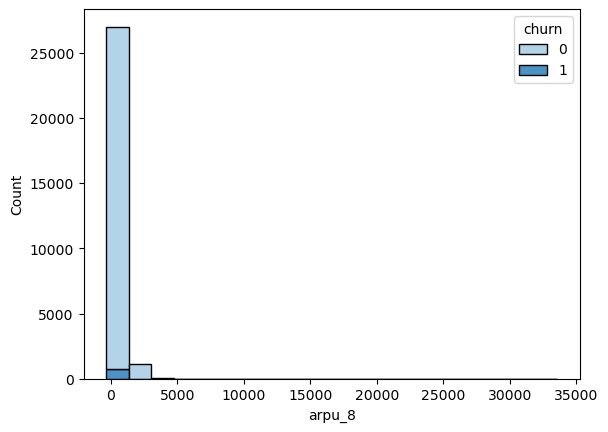

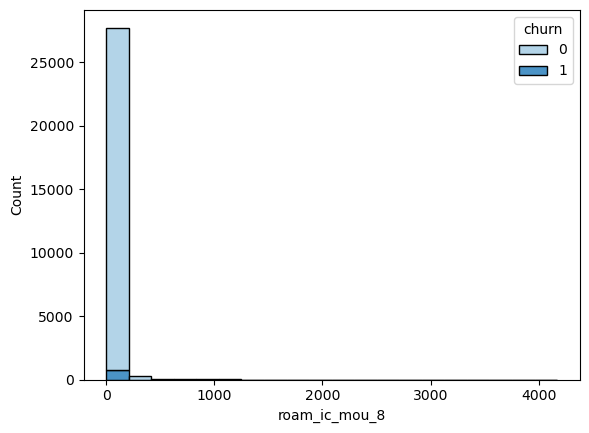

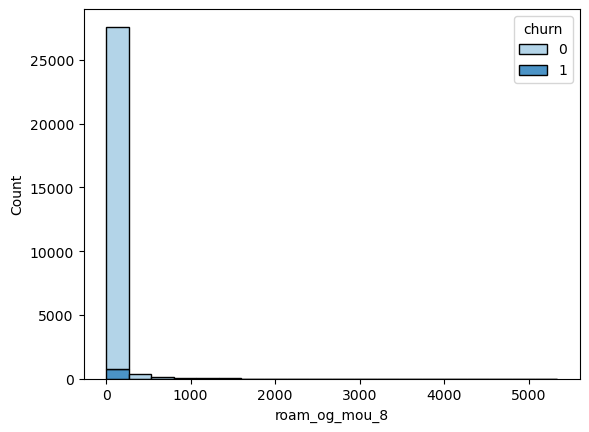

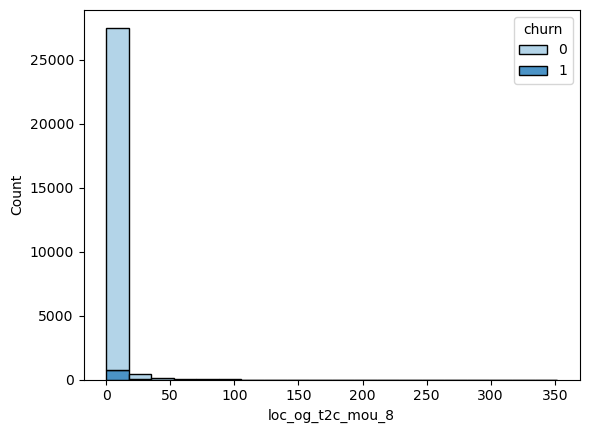

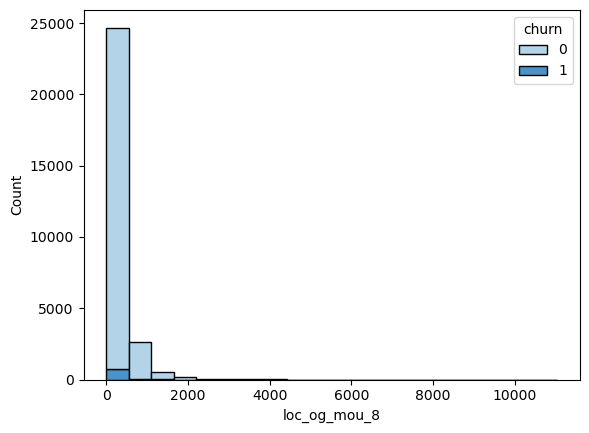

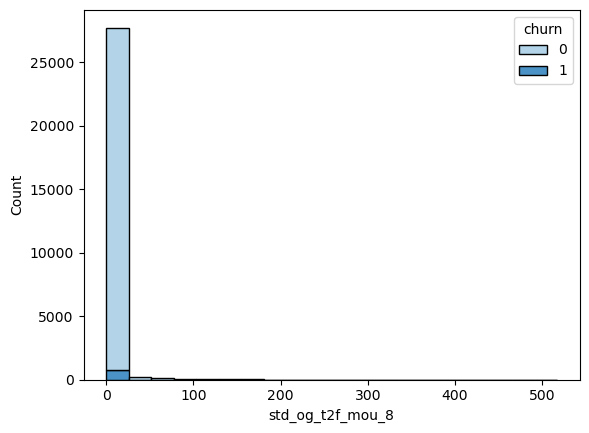

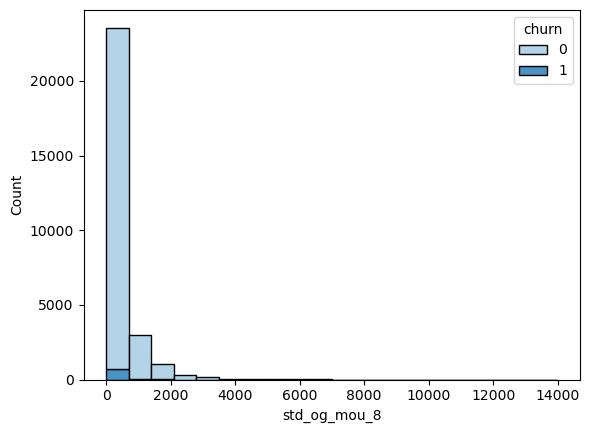

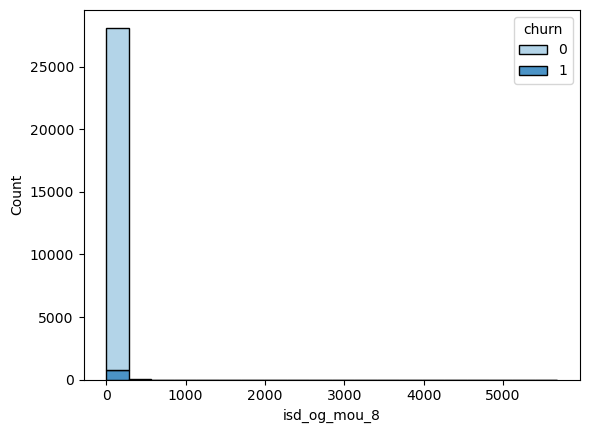

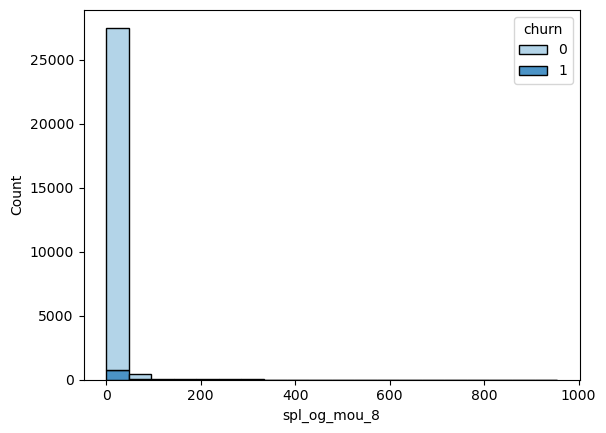

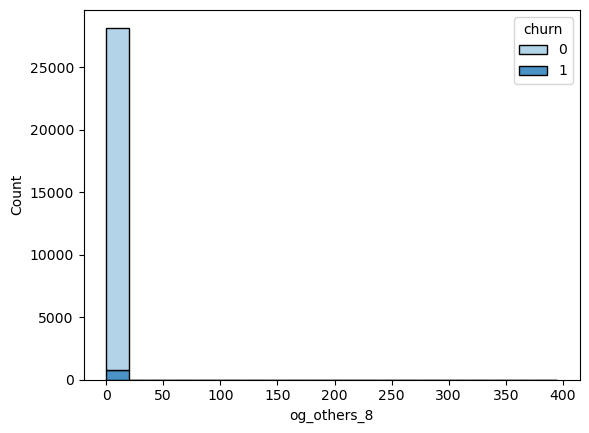

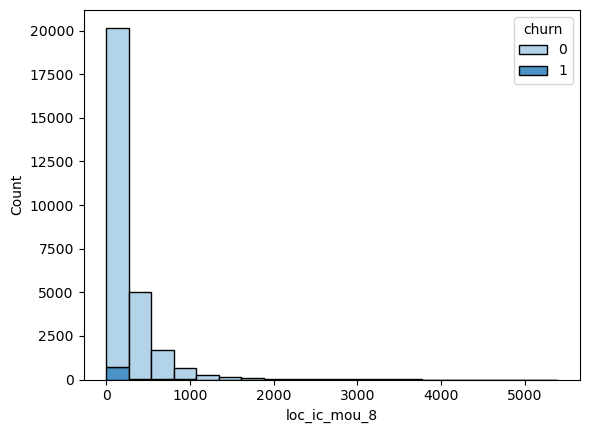

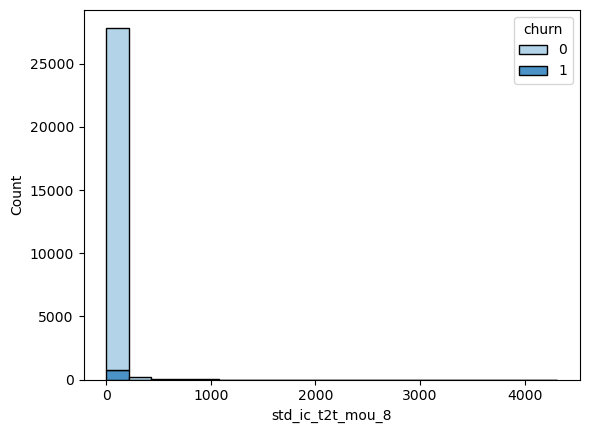

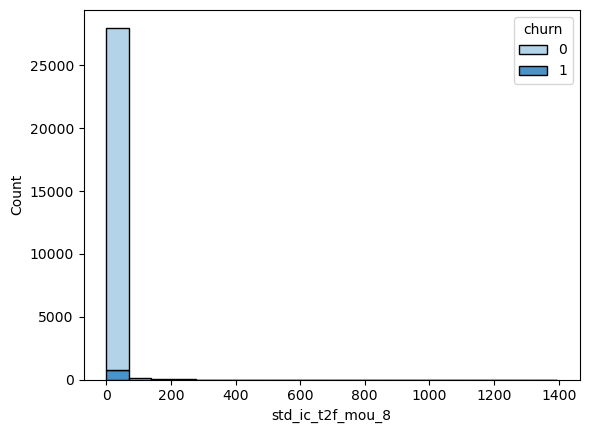

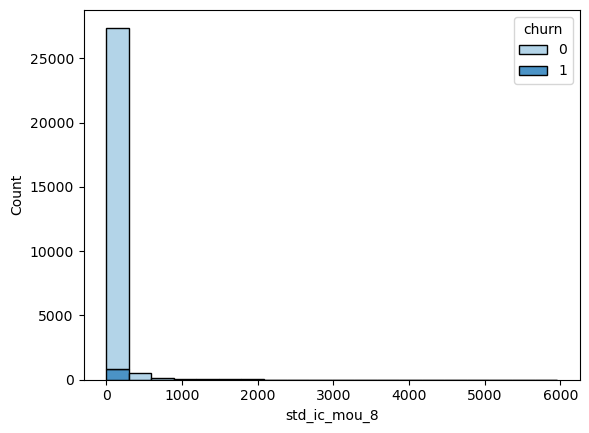

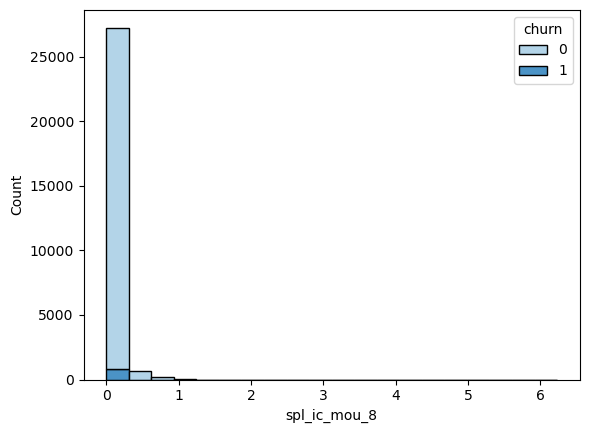

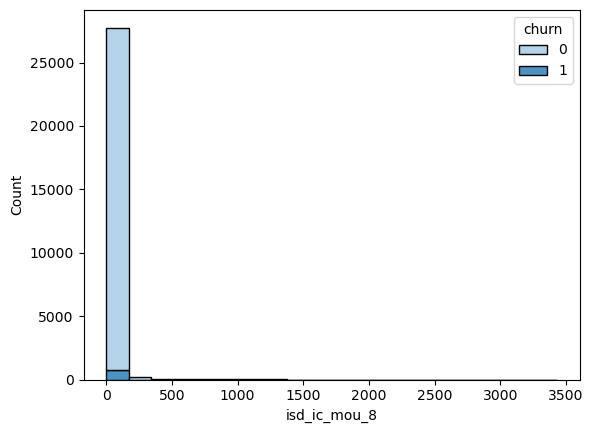

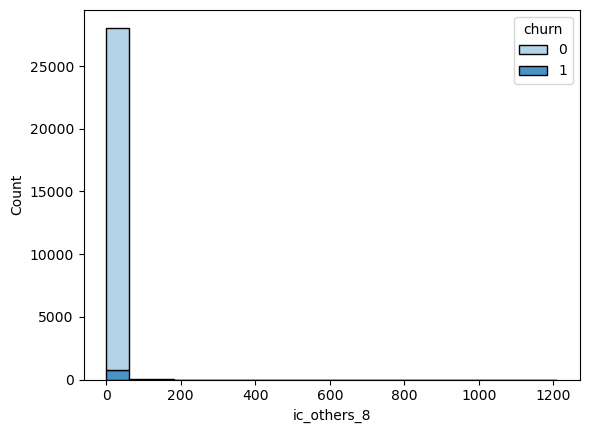

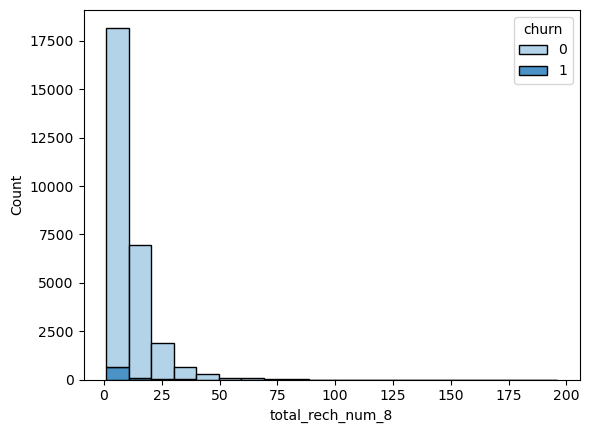

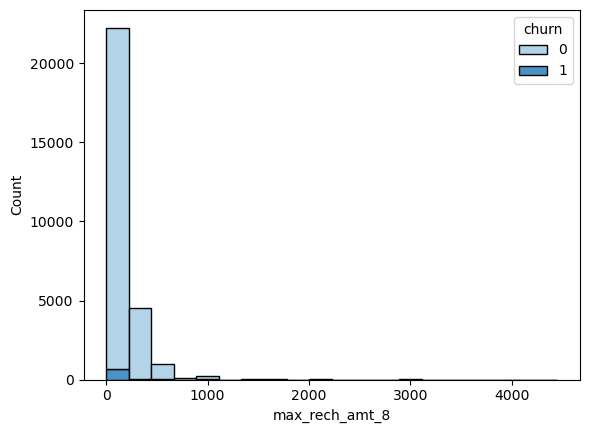

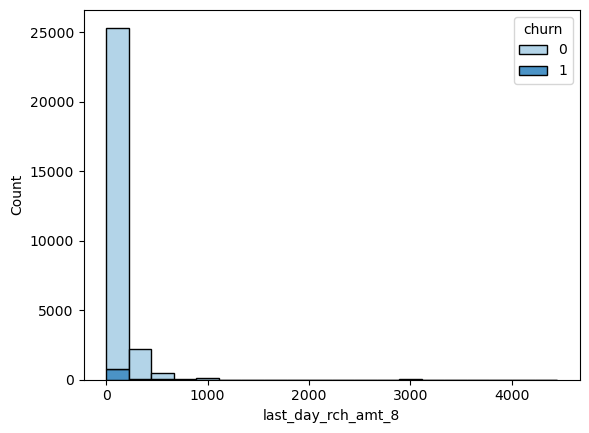

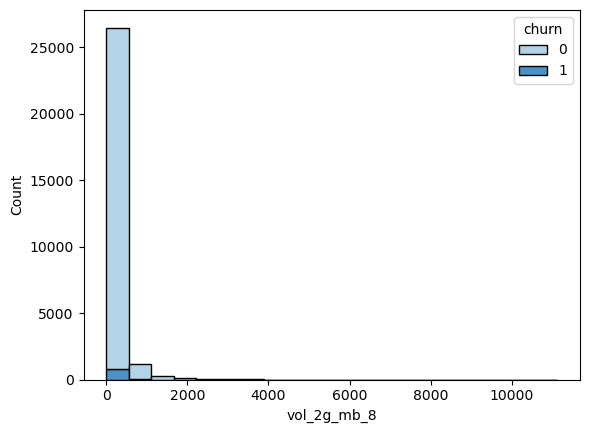

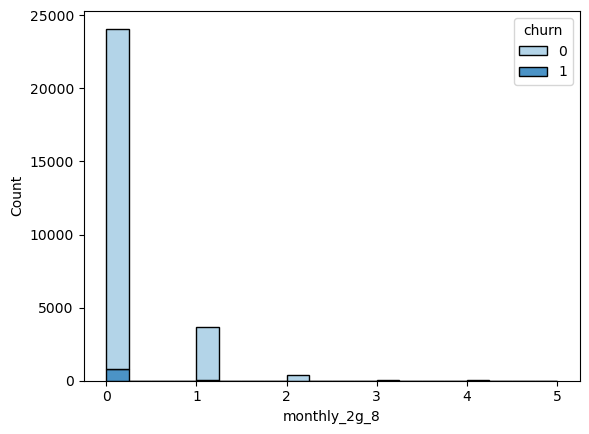

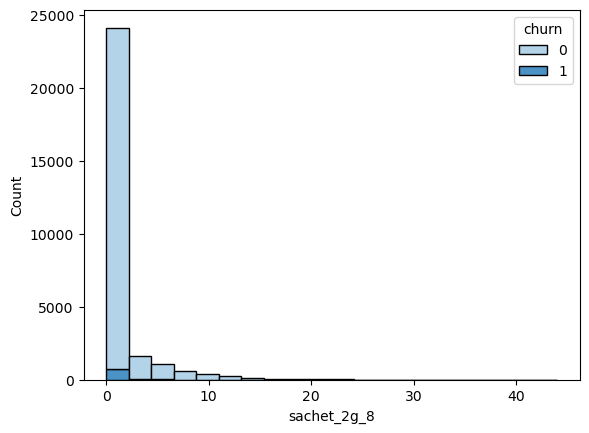

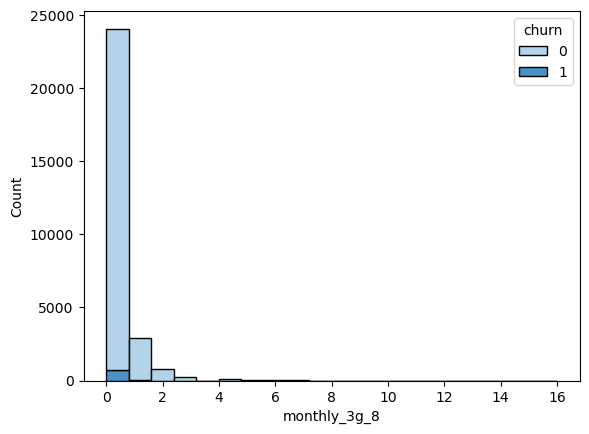

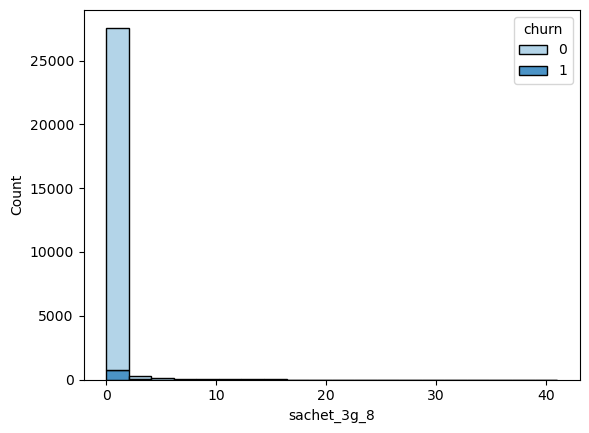

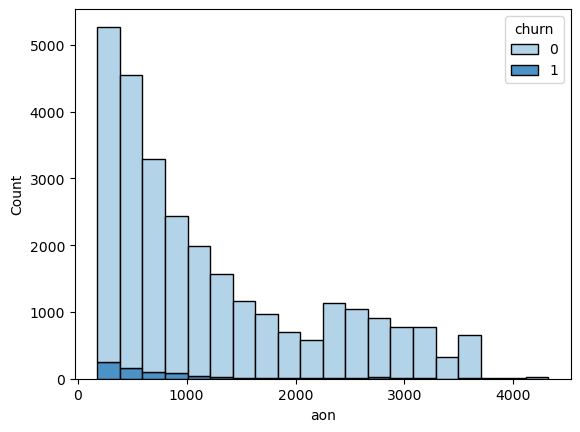

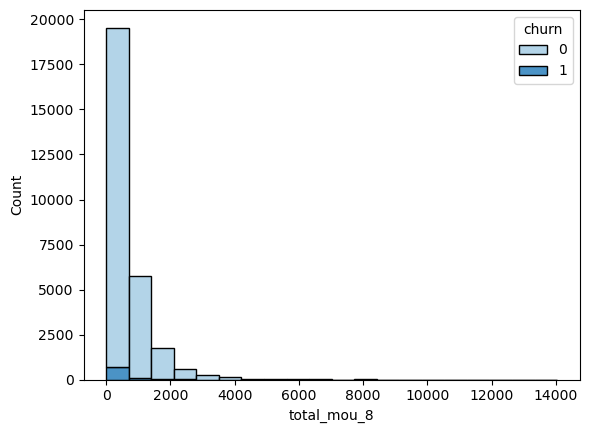

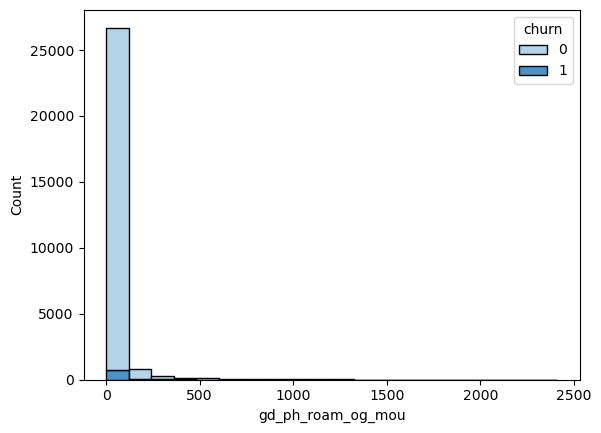

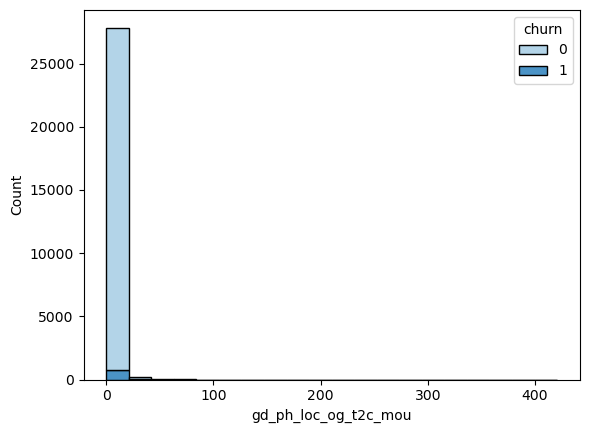

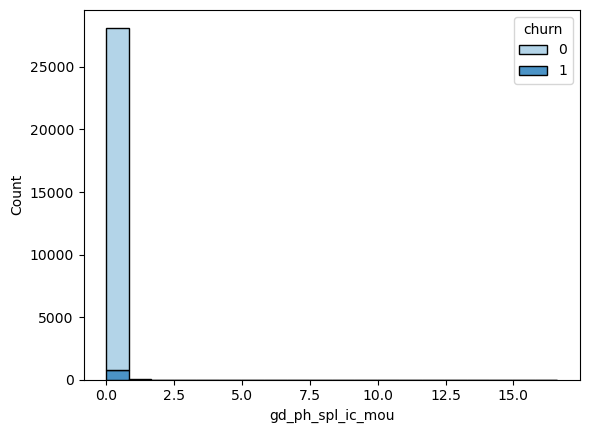

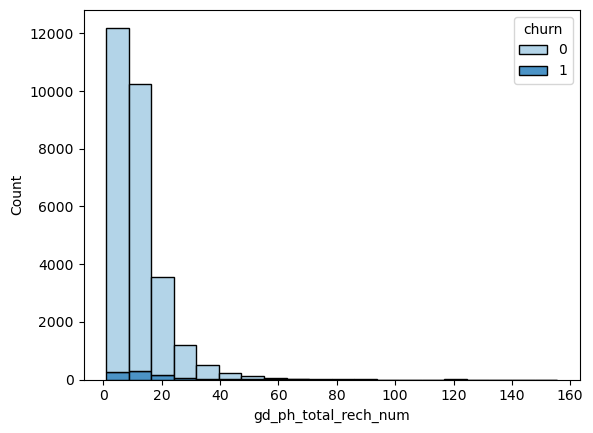

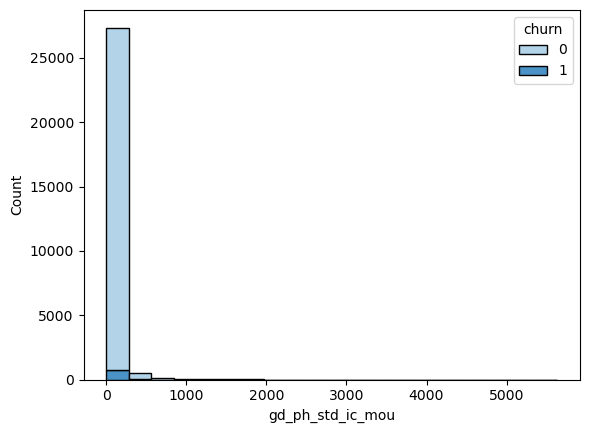

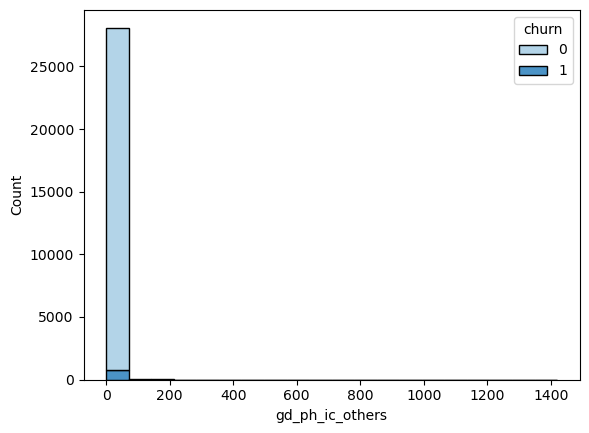

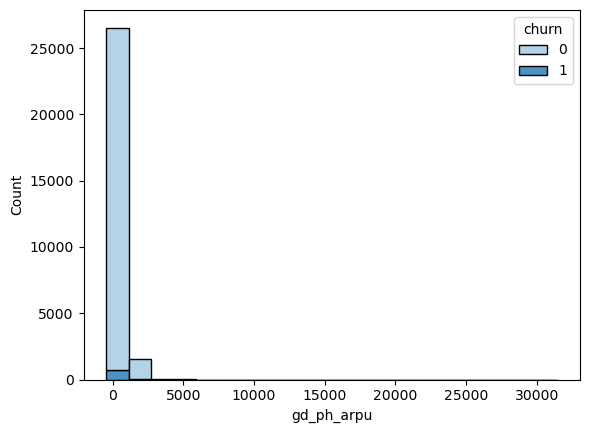

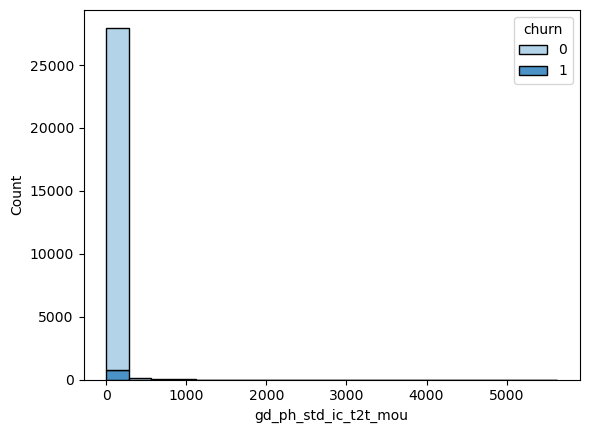

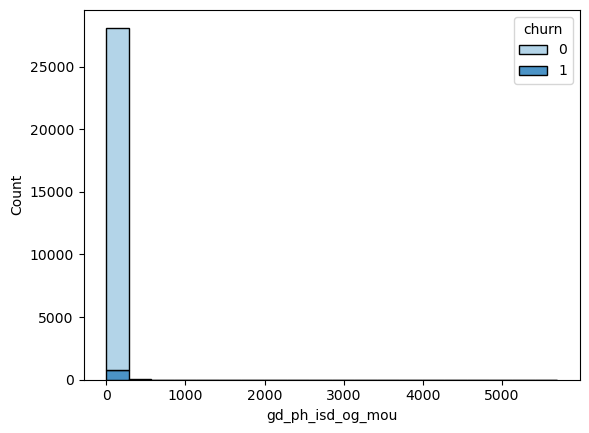

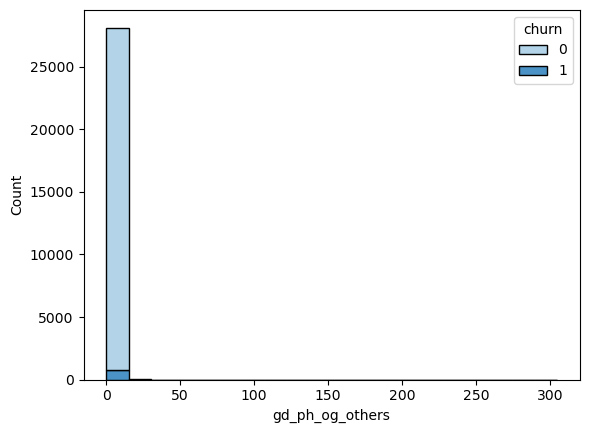

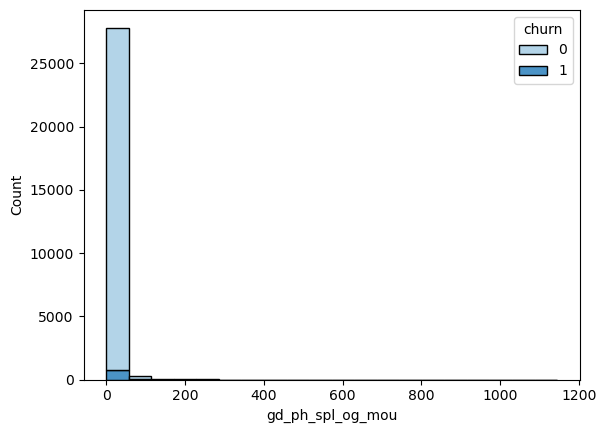

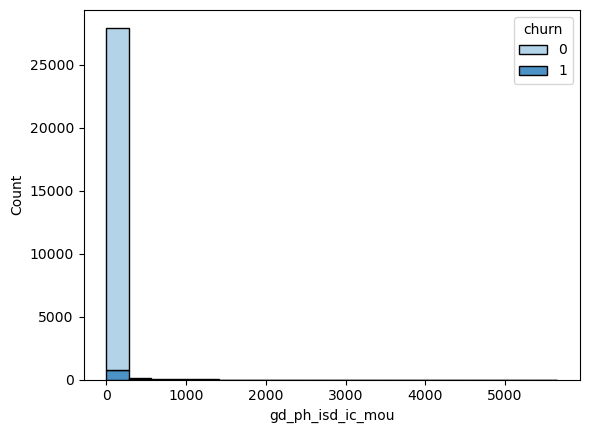

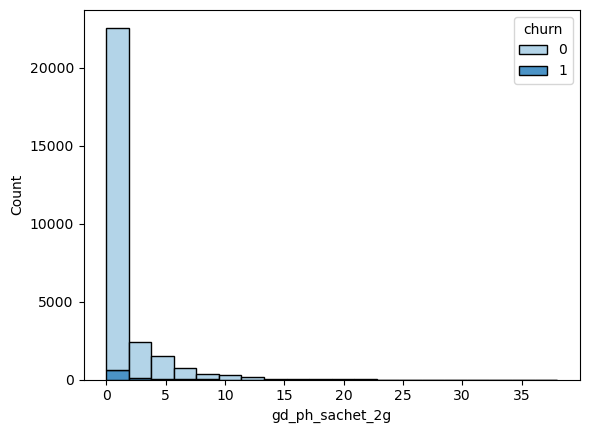

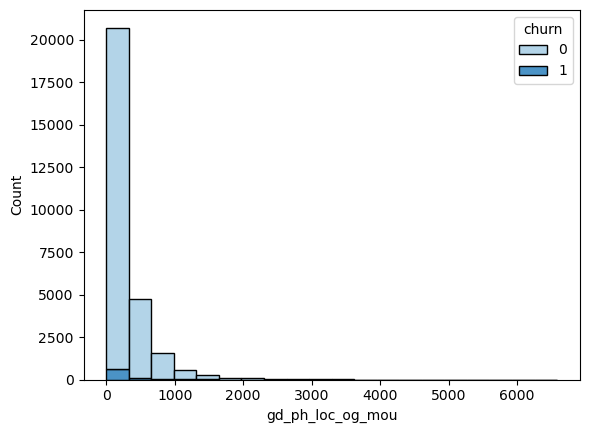

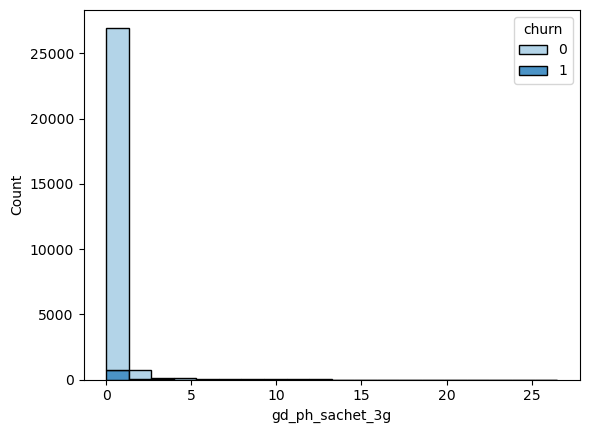

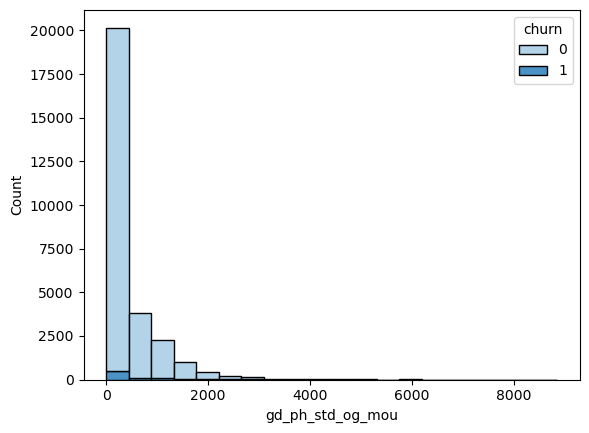

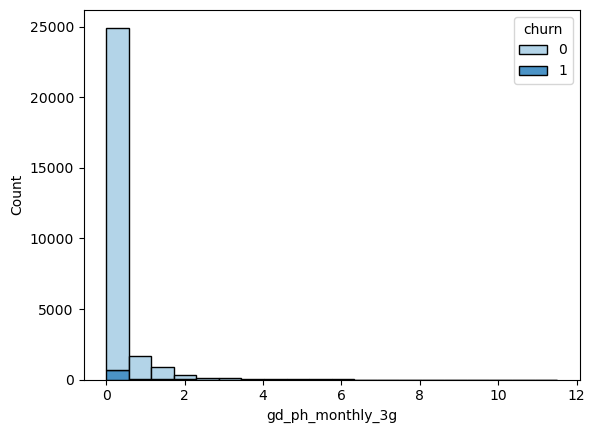

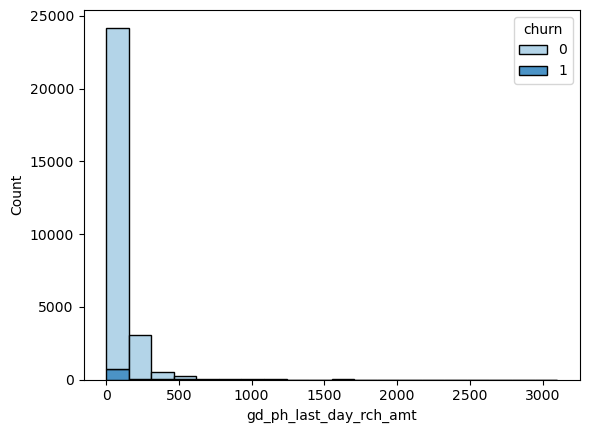

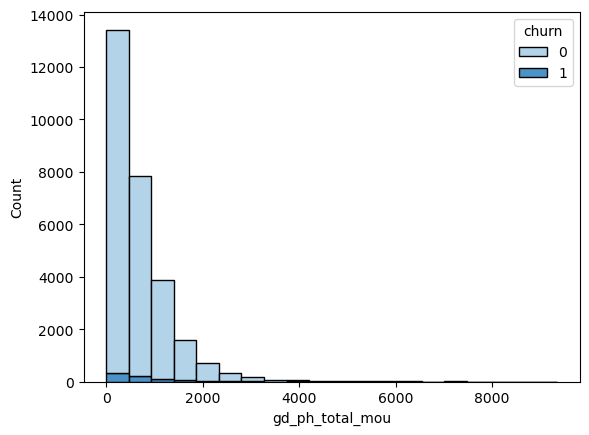

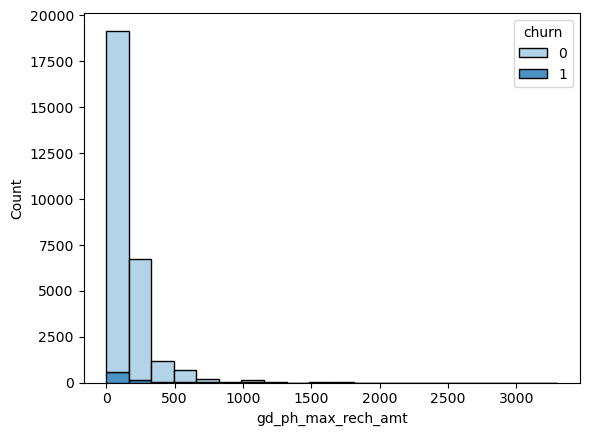

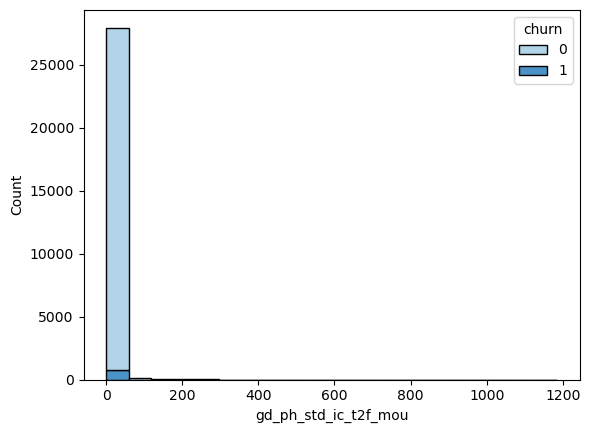

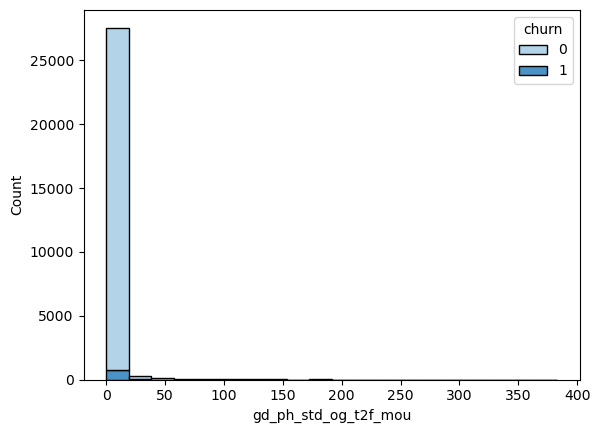

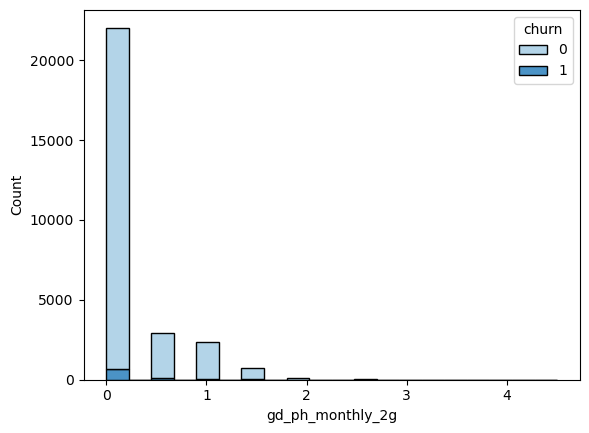

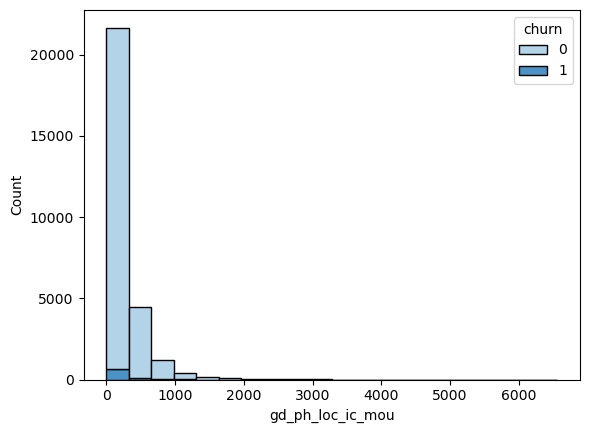

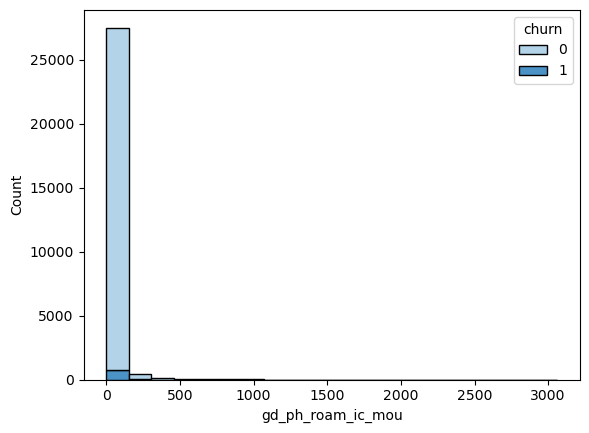

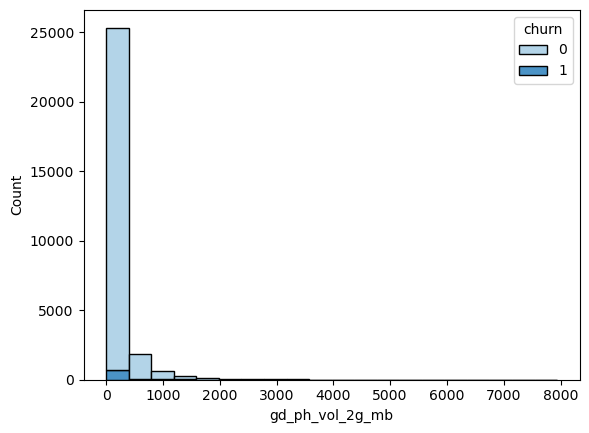

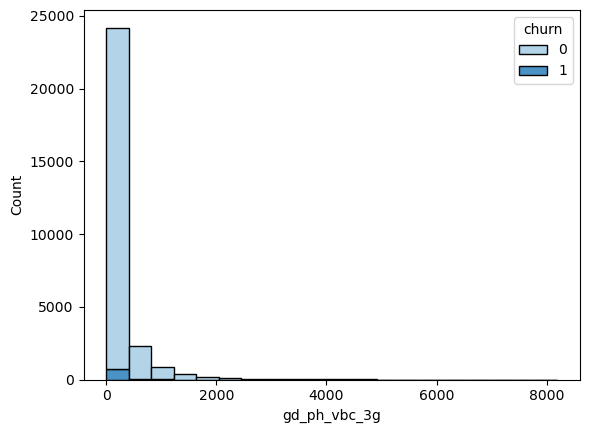

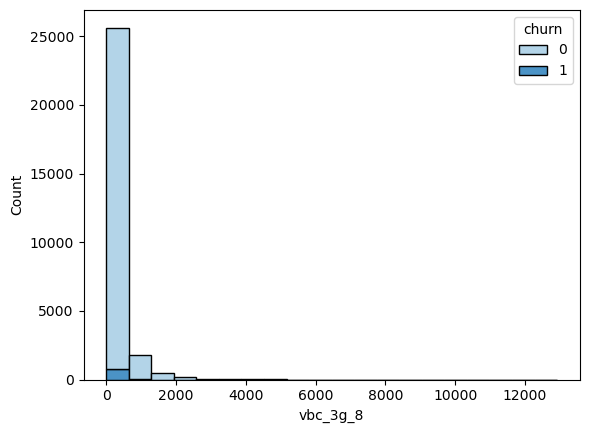

In [45]:
# Analysis of continuous columns vs user churn
for i in cnts_features:
    if i != 'churn':
        sns.histplot(data = churn_data,x = i,hue = 'churn',alpha = 0.9,multiple = 'stack',bins=20,palette='Blues')
        plt.show()

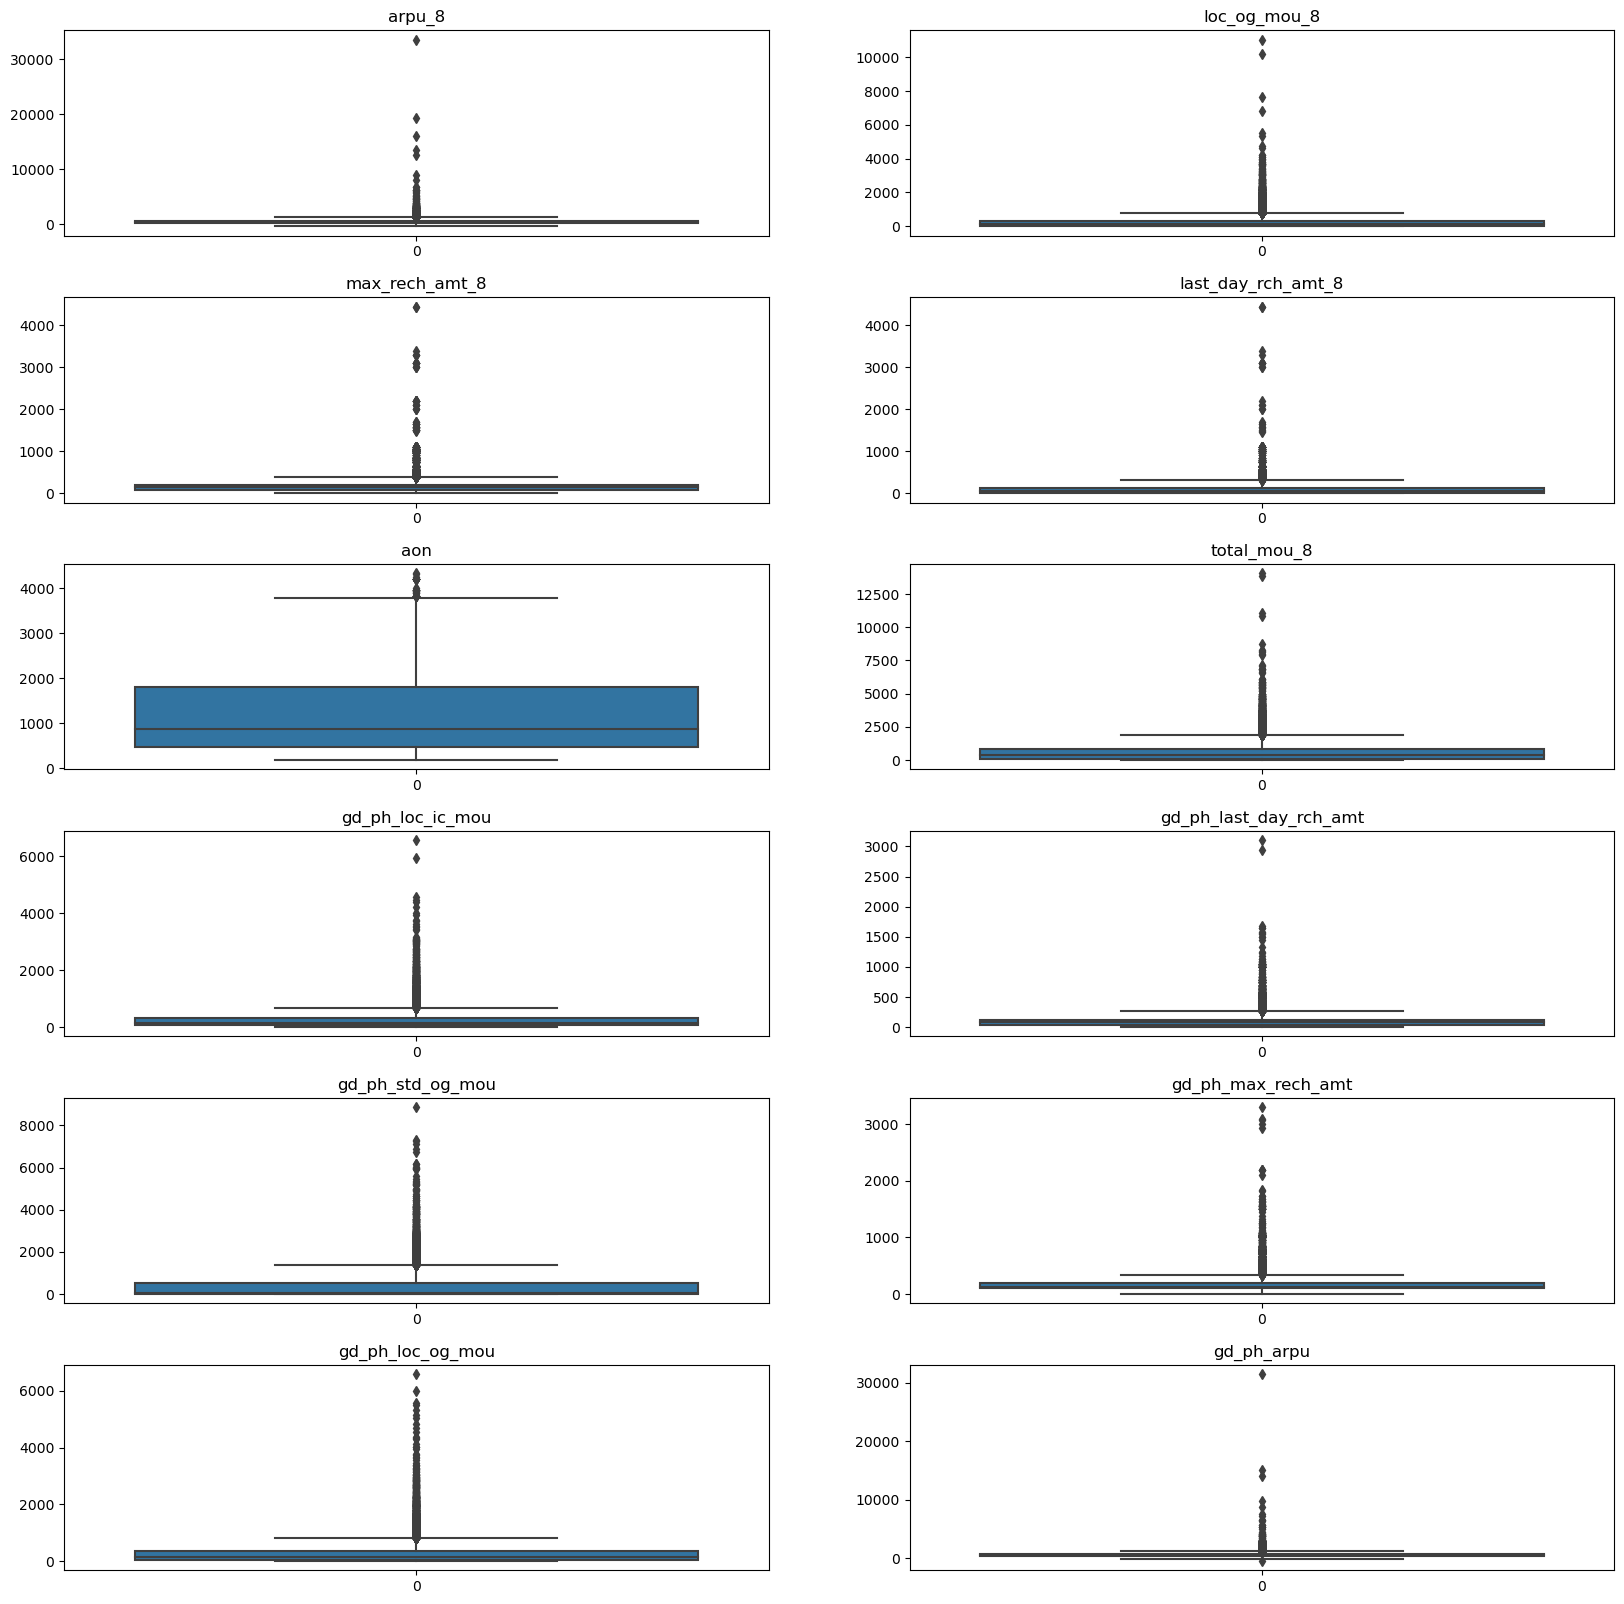

In [46]:
# Going through the output of describe we can filter out the features that needs a second look
# Not taking ISD Roaming both incoming and outgoing in considering.

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i in range(nrows):
    for j in range(ncols):
        index = i * ncols + j
        if index < len(col_boxplot):
            sns.boxplot(churn_data[col_boxplot[index]], ax=axes[i, j])
            axes[i, j].set_title(col_boxplot[index])
        else:
            fig.delaxes(axes[i, j])

plt.subplots_adjust(hspace=0.3) 
plt.show()

> #### Observations
> * From the above plots, defining the below upper limits to the below variables

> | Feature | Value |
> | --- | --- |
> | arpu_8 | 7000|
> | loc_og_mou_8 | 4000|
> | max_rech_amt_8 | 1000 |
> | last_day_rch_amt_8 | 1000 |
> | aon | 3000 | 
> | total_mou_8 | 4000 | 
> | gd_ph_loc_ic_mou | 3000 |
> | gd_ph_last_day_rch_amt | 1000 |
> | gd_ph_std_og_mou | 4000 | 
> | gd_ph_max_rech_amt | 1500 |
> | gd_ph_loc_og_mou | 3000 |
> | gd_ph_arpu | 7000 |

> * Changes to be made post exploration of other features


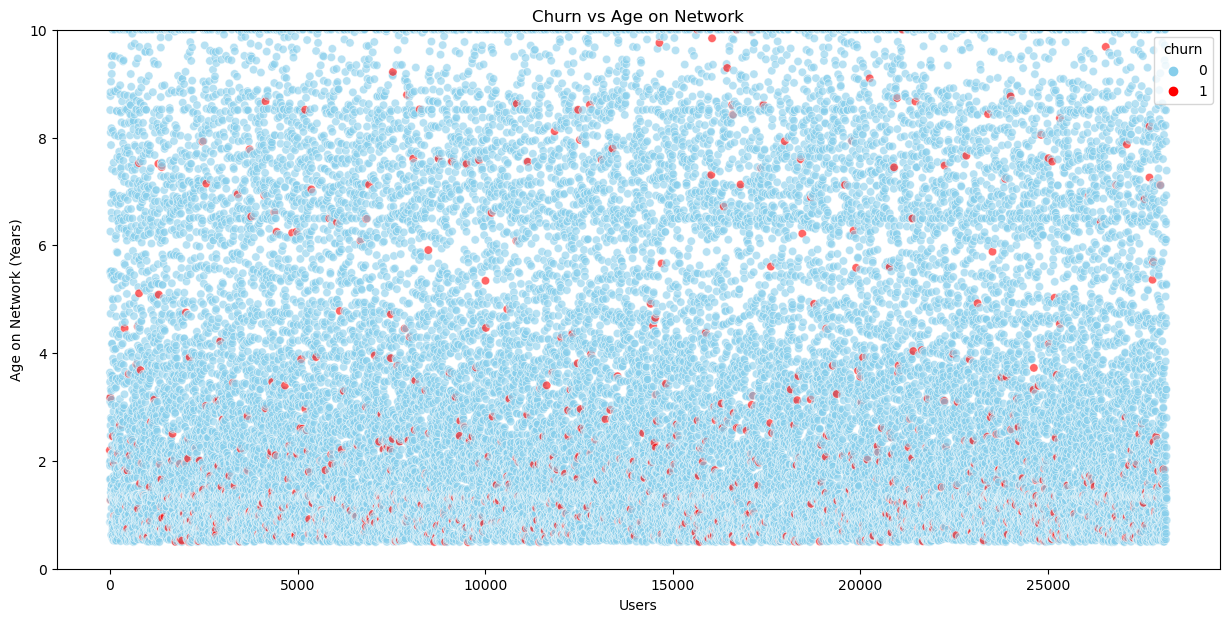

In [47]:
# Checking churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn, alpha=0.6, palette=['skyblue', 'red'])
plt.ylim(0, 10)
plt.xlabel('Users')
plt.ylabel('Age on Network (Years)')
plt.title('Churn vs Age on Network')
plt.show()


> #### Observation
> * We can clearly see that the majority of the churns are for user who had a tenure of less than 4 years

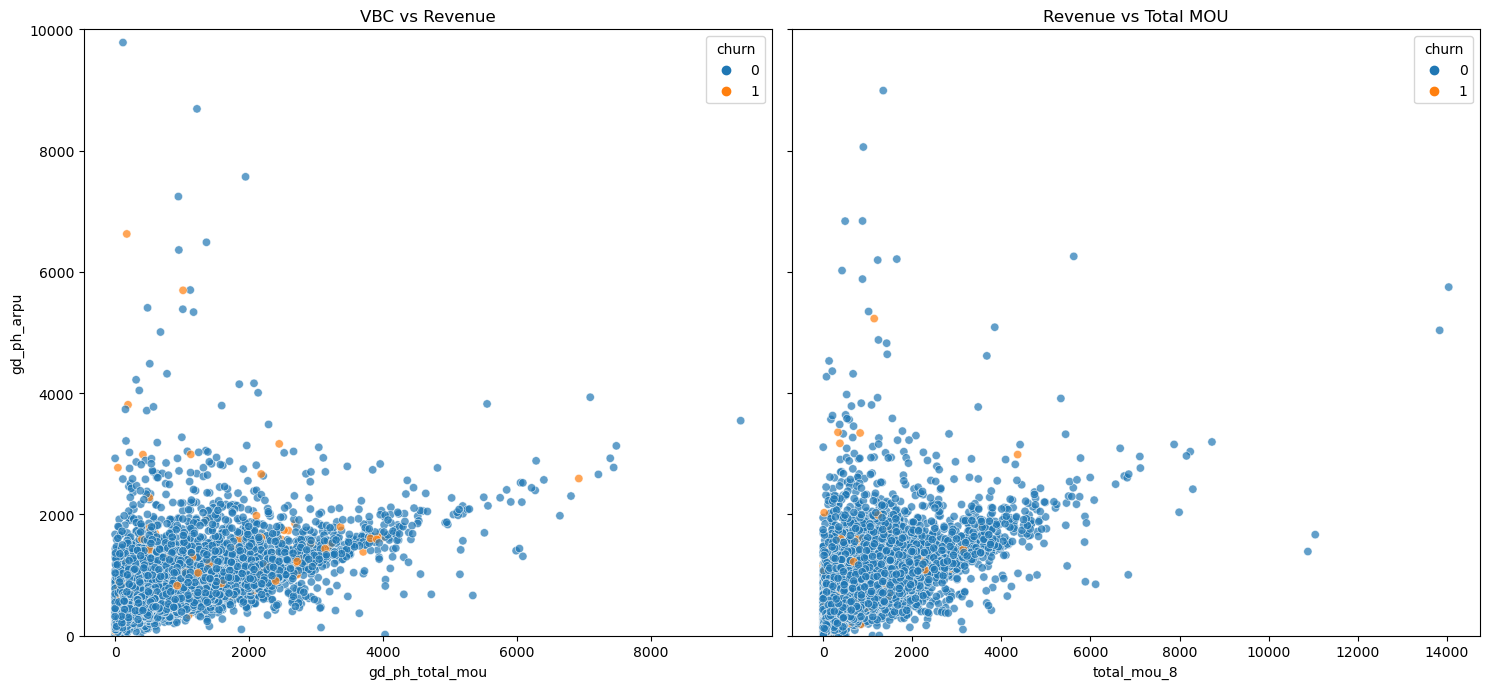

In [48]:
# Analysis for Volume based cost effects the total revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn_data, ax=axes[0], hue='churn', alpha=0.7)
axes[0].set_title("VBC vs Revenue")
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)
axes[1].set_title("Revenue vs Total MOU")

plt.ylim(0,10000)
plt.tight_layout() # for adjusting the plots for better visualization
plt.show()

> #### Observation
> * It is evident from the data that the mobile usage minutes of the churners in the 8th month have dramatically decreased, resulting in a decline in their generated revenue

> * It is noteworthy that even though the mobile usage minutes were within the range of 0-2000, the highest revenue was generated in that range, suggesting that these users utilized other services that contributed to their revenue.


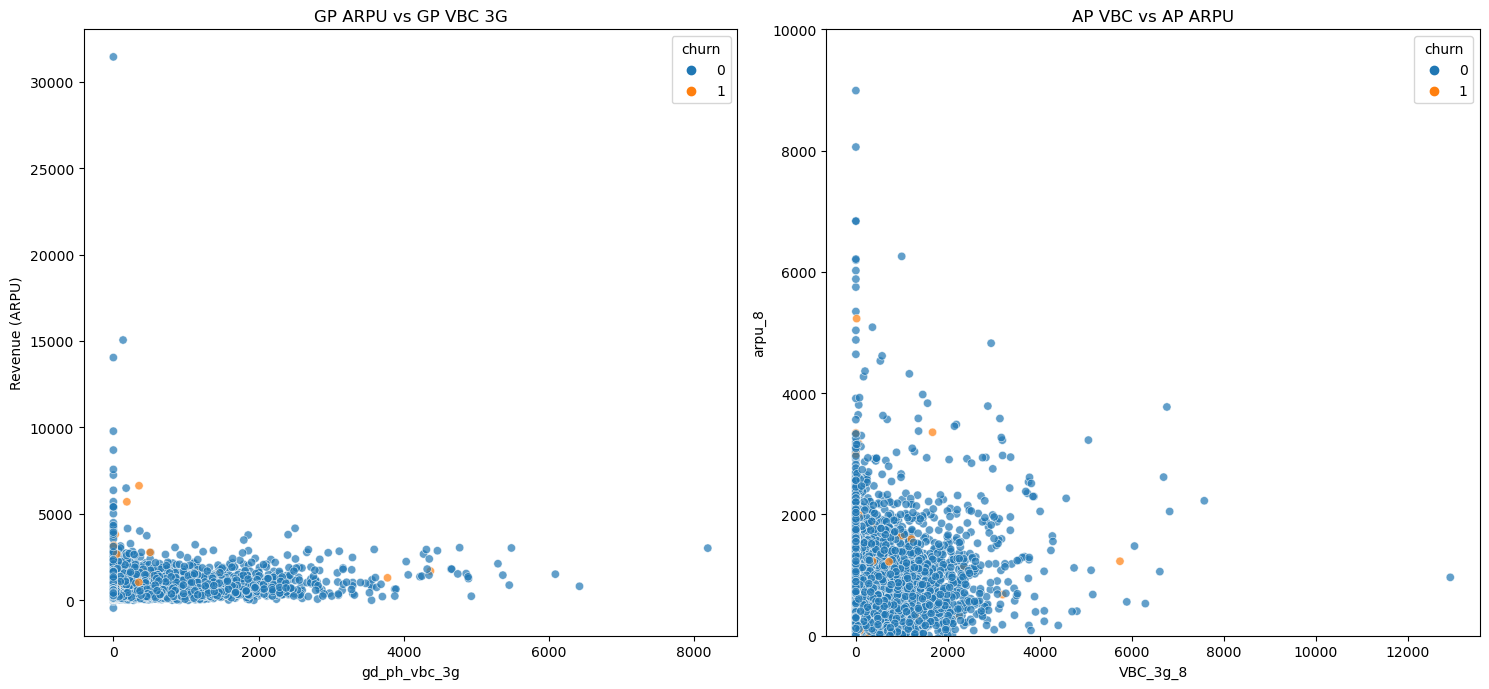

In [49]:
# Plotting the Relationship between VBC and Revenue
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(x='gd_ph_vbc_3g', y='gd_ph_arpu', hue='churn', data=churn_data, alpha=0.7, ax=axes[0])
sns.scatterplot(x='vbc_3g_8', y='arpu_8', hue='churn', data=churn_data, alpha=0.7, ax=axes[1])

# Adding Titles and Labels #  GP is good phase and ARPU = Average Revenue per user
# VBC is volume based cost
# AP is action phase
axes[0].set_title('GP ARPU vs GP VBC 3G')
axes[1].set_title('AP VBC vs AP ARPU')
axes[0].set_xlabel('gd_ph_vbc_3g')
axes[0].set_ylabel('Revenue (ARPU)')
axes[1].set_xlabel('VBC_3g_8')

# Limiting y-axis to general upper bound
plt.ylim(0, 10000)
plt.tight_layout()
plt.show()


 > #### Observation
> * The relationship between the usage of very-low-volume based cost data and revenue generation among customers can be observed from the plot. It appears that those customers who generated high revenue despite low usage of VBC data are more likely to churn. Additionally, the plot suggests that there is a higher revenue generation for customers with lower consumption of VBC data.

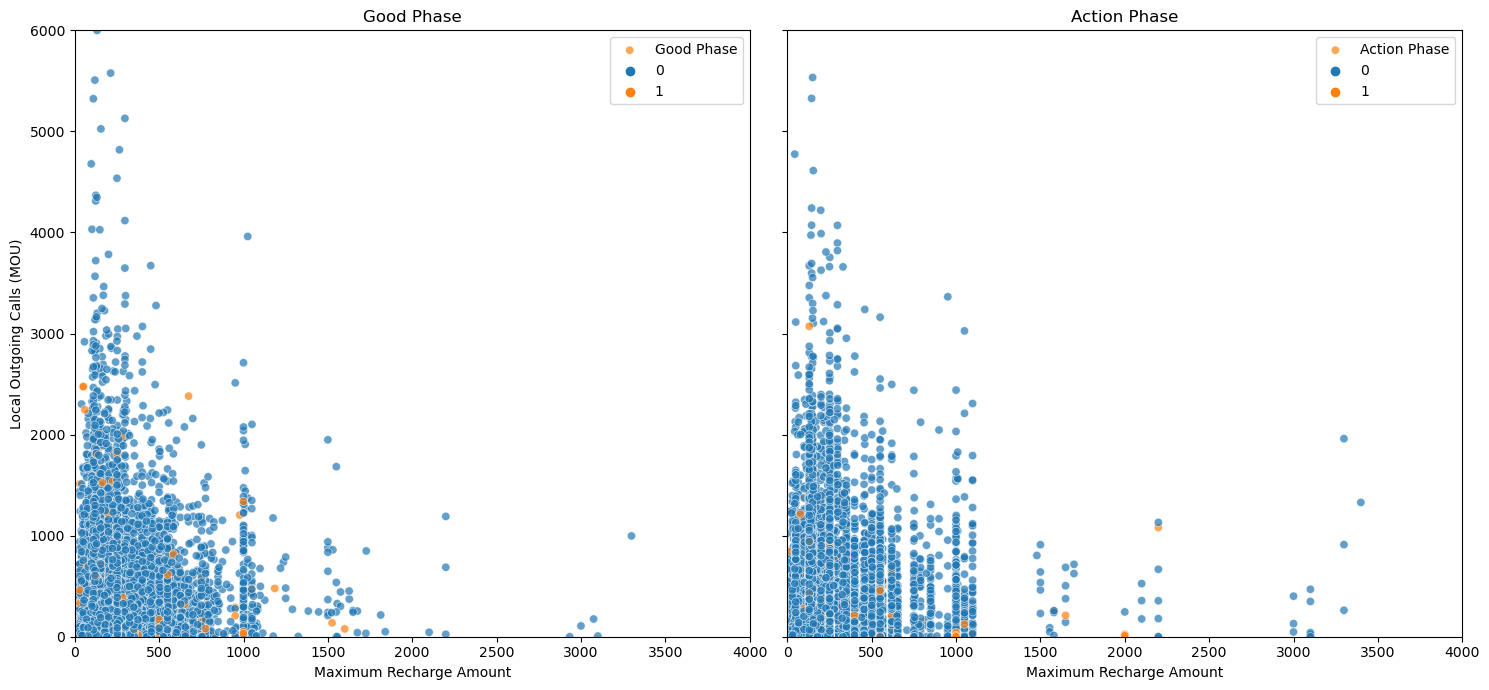

In [50]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7, label='Good Phase')
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7, 
                label='Action Phase')

# Adding titles to the subplots
axes[0].set_title('Good Phase')
axes[1].set_title('Action Phase')

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
axes[0].set_ylim(0,6000)
axes[1].set_ylim(0,6000)

# Adding legend
axes[0].legend(loc='best')
axes[1].legend(loc='best')

# Adding x-axis label
axes[0].set_xlabel('Maximum Recharge Amount')
axes[1].set_xlabel('Maximum Recharge Amount')

# Adding y-axis label
axes[0].set_ylabel('Local Outgoing Calls (MOU)')
axes[1].set_ylabel('Local Outgoing Calls (MOU)')

plt.tight_layout()
plt.show()

> #### Observations
> * Users who recharge with high amounts seem to make fewer local outgoing calls compared to users who recharge with lower amounts.
> * It is observed that even during the good phase, users with lower max recharge amounts and lower local outgoing calls have a higher tendency to churn

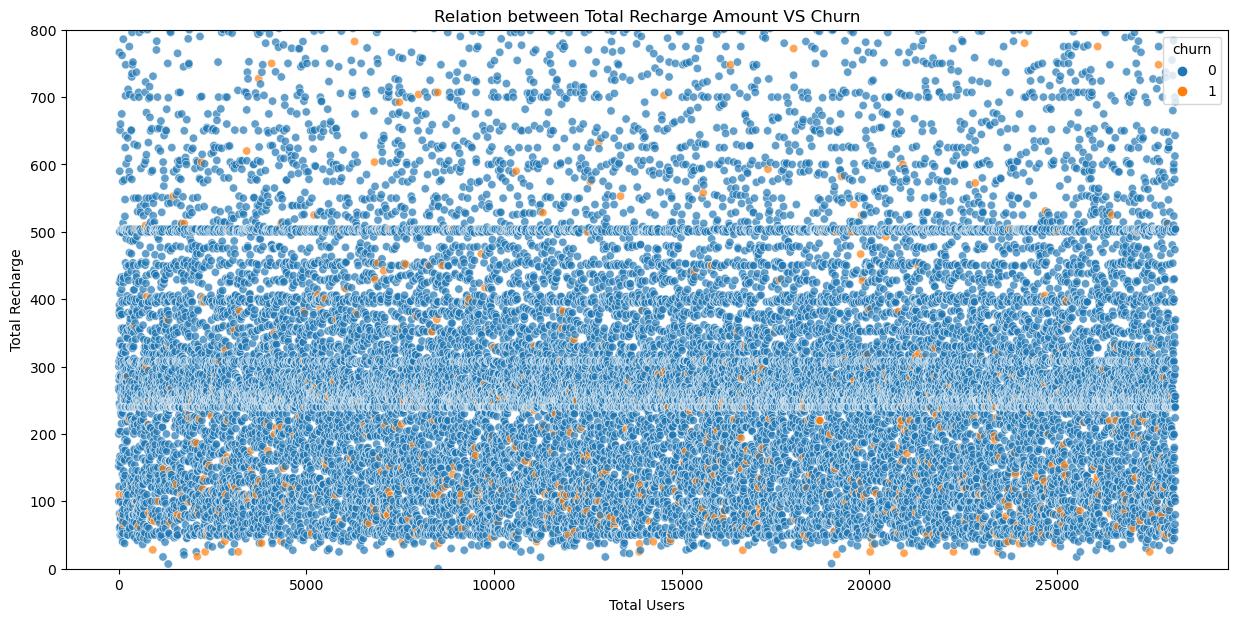

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['gd_ph_max_rech_amt'] + churn_data['max_rech_amt_8'],
                hue=churn_data['churn'], alpha=0.7, ax=ax)

# Add a title to the plot
ax.set_title('Relation between Total Recharge Amount VS Churn')

# Limit the y-axis
ax.set_ylim(0, 800)
plt.ylabel('Total Recharge')
plt.xlabel('Total Users')

# Show the plot
plt.show()

> #### Observation
> * Most users who churned had the max recharge amount less than 200.

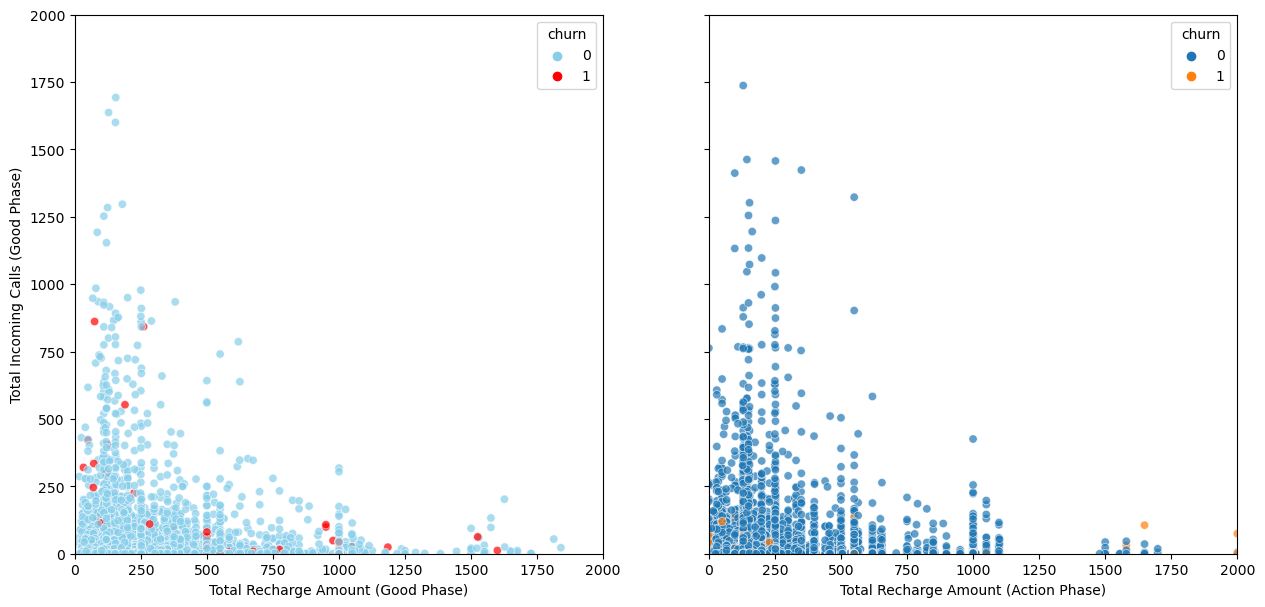

In [52]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))

# Scatterplot of total recharge amount vs total incoming calls in good phase
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7,palette=['skyblue', 'red'])

# Scatterplot of total recharge amount vs total incoming calls in action phase
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Adding labels and limits to the axis
axes[0].set_xlabel("Total Recharge Amount (Good Phase)")
axes[0].set_ylabel("Total Incoming Calls (Good Phase)")
axes[0].set_xlim(0,2000)
axes[0].set_ylim(0,2000)

axes[1].set_xlabel("Total Recharge Amount (Action Phase)")
axes[1].set_ylabel("Total Incoming Calls (Action Phase)")
axes[1].set_xlim(0,2000)
axes[1].set_ylim(0,2000)

plt.show()


> #### Observation
> * Users who had high recharge amounts but low incoming calls during the good phase churned more.

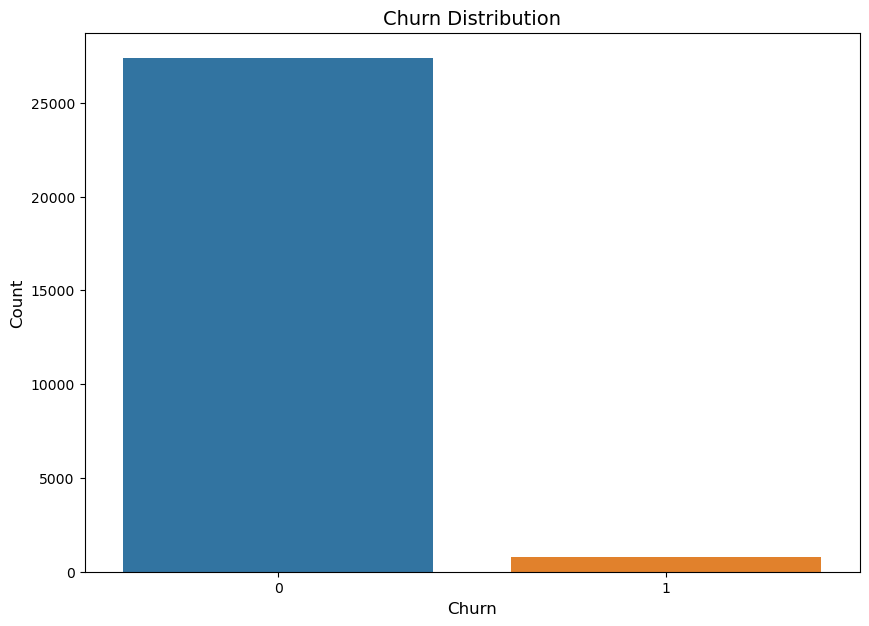

In [53]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='churn', data=churn_data, ax=ax)
ax.set_xlabel('Churn', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Churn Distribution', fontsize=14)
plt.show()

> #### Observation
> * The varible is not skwed but it is higly imbalanced, the number of non-churners in the dataset is around 94%
> * We will handle this imbalance using SMOTE algorithm

# 5. Preparing the data for model building

In [54]:
# Cap the features with high outliers - Setting the upper limit identified in previous steps

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    churn_data[col] = churn_data[col].apply(lambda x : x if x < value else value)

churn_data[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0  3171.480        255.79            1000                 779   802   
1   137.362         63.04              30                  10   315   
2   637.760        129.74              50                  50   720   
3   366.966        182.14             179                   0   604   
4   409.230          0.00             455                 455  1328   

   total_mou_8  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0       378.20           391.555                     0.0            68.000   
1       171.56            52.630                    25.0           136.870   
2      1068.53           106.505                    25.0           848.990   
3       239.47           145.520                    89.5             4.355   
4         0.00             2.180                   126.0             0.000   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0              1185.0           478.035   1209.5150  
1               122.0           333.135    435.4720  
2                50.0            95.565    556.1030  
3                89.5           132.795    134.1235  
4               753.5             0.000   1669.9265

In [55]:
# Moving Churn information to Y and drop Churn from X
y = churn_data['churn']
X = churn_data.drop('churn', axis=1)

## 5.1 Standardization

In [56]:
# Importing necessary Libraries

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# 5.2 Handling Class Imbalance

In [57]:
churn_data.churn.value_counts()

0    27368
1      795
Name: churn, dtype: int64

In [58]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [59]:
y_res.value_counts()

1    27368
0    27368
Name: churn, dtype: int64

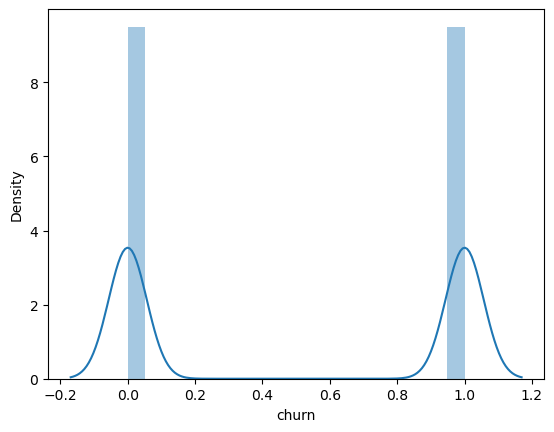

In [60]:
sns.distplot(y_res)
plt.show()

> It can be observed that now the class is balanced and the target variable is not skewed 

## 5.3 Principal Component Analysis (PCA)

In [61]:
X.shape

(28163, 55)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(54736, 25)

# 6. Model Building & Evaluation

### 6.1 Logistic Regression Model

> For logistic regression, we will use the original X and y without any alterations, in order to employ Recursive Feature Elimination (RFE) for feature selection instead of Principal Component Analysis (PCA), with the aim of identifying the most significant predictors of churn.

##### Spliting train and test data set

In [63]:
# Split the data into train and test

# Importing the sklearn libarary

from sklearn.model_selection import train_test_split

train_size = 0.7
test_size = 0.3
random_state = 25

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    train_size=train_size, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

In [64]:
# Import statsmodels

import statsmodels.api as sm

# Initializing Logistic Regression Model

In [65]:
# Initializing logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38259
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17922.
Date:                Sun, 12 Feb 2023   Deviance:                       35845.
Time:                        05:14:01   Pearson chi2:                 7.69e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3629
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3636      0.022    -63.004      0.000      -1.406      -1.321
arpu_8                     0.4504      0.048      9.424      0.000       0.357       0.544
roam_ic_mou_8             -0.4452      0.036    -12.378      0.000      -0.516      -0.375
roam_og_mou_8              0.0057      0.032      0.177      0.859      -0.057       0.069
loc_og_t2c_mou_8           0.0747      0.022      3.354      0.001       0.031       0.118
loc_og_mou_8              -0.4001      0.084     -4.737      0.000      -0.566      -0.235
std_og_t2f_mou_8          -0.1163      0.039     -2.968      0.003      -0.193      -0.040
std_og_mou_8              -0.0693      0.114     -0.606      0.545      -0.294       0.155
isd_og_mou_8              -0.1779      0.063     -2.816      0.005      -0.302      -0.054
spl_og_mou_8              -0.1234      0.032     -3.889      0.000      -0.186      -0.061
og_others_8                0.1005      0.025      3.984      0.000       0.051       0.150
loc_ic_mou_8              -1.5884      0.056    -28.123      0.000      -1.699      -1.478
std_ic_t2t_mou_8          -0.5684      0.063     -9.003      0.000      -0.692      -0.445
std_ic_t2f_mou_8          -0.0960      0.049     -1.963      0.050      -0.192      -0.000
std_ic_mou_8              -0.1627      0.045     -3.585      0.000      -0.252      -0.074
spl_ic_mou_8              -0.2792      0.023    -12.303      0.000      -0.324      -0.235
isd_ic_mou_8              -0.1126      0.026     -4.283      0.000      -0.164      -0.061
ic_others_8                0.1983      0.031      6.351      0.000       0.137       0.259
total_rech_num_8          -0.4400      0.033    -13.302      0.000      -0.505      -0.375
max_rech_amt_8             0.1847      0.024      7.767      0.000       0.138       0.231
last_day_rch_amt_8        -0.6290      0.022    -28.319      0.000      -0.672      -0.585
vol_2g_mb_8               -0.2795      0.030     -9.441      0.000      -0.338      -0.221
monthly_2g_8              -0.6206      0.028    -22.184      0.000      -0.675      -0.566
sachet_2g_8               -0.6129      0.030    -20.419      0.000      -0.672      -0.554
monthly_3g_8              -0.8174      0.036    -22.752      0.000      -0.888      -0.747
sachet_3g_8               -0.5160      0.039    -13.202      0.000      -0.593      -0.439
aon                       -0.3839      0.016    -23.830      0.000      -0.415      -0.352
total_mou_8               -0.7182      0.128     -5.612      0.000      -0.969      -0.467
gd_ph_roam_og_mou          0.4515      0.055      8.254      0.000       0.344       0.559
gd_ph_loc_og_t2c_mou      -0.0470      0.019     -2.470      0.013      -0.084      -0.010
gd_ph_spl_ic_mou          -0.0085      0.023     -0.377      0.706      -0.053  

 __From the above summary we can see that a lot of the features are insignificant based on the p-value. So we need to narrow down our analysis to a few significant features. For this purpose we can use RFE.__

### Feature selection using RFE

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize a Logistic Regression model with the liblinear solver
logreg = LogisticRegression(solver='liblinear')

# Number of features to select = 25

# Create the RFE object
rfe = RFE(logreg, n_features_to_select =25)

# Fit the RFE object to the data
rfe.fit(X_train, y_train)
# rfe.support_

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=25)

In [67]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'gd_ph_roam_og_mou', 'gd_ph_total_rech_num', 'gd_ph_std_ic_t2t_mou',
       'gd_ph_loc_og_mou', 'gd_ph_sachet_3g', 'gd_ph_std_og_mou',
       'gd_ph_monthly_3g', 'gd_ph_total_mou', 'gd_ph_loc_ic_mou',
       'gd_ph_vol_2g_mb'],
      dtype='object')

In [68]:
# Add a constant to the training data
X_train_sm = sm.add_constant(X_train[rfe_col])

# Fit the Generalized Linear Model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm2.fit()

# Print the summary of the model's fit
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38289
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18208.
Date:                Sun, 12 Feb 2023   Deviance:                       36416.
Time:                        05:14:36   Pearson chi2:                 6.86e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3533
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2842 

In [69]:
# Predict the target variable using the trained model
y_train_pred = result.predict(X_train_sm).values.reshape(-1)

# Create a dataframe with the actual target variable and predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn': y_train, 'Churn_Prob': y_train_pred})

# Map the predicted probabilities to binary predictions
y_train_pred_final['predicted'] = (y_train_pred_final['Churn_Prob'] > 0.5).astype(int)

# Print the first 5 rows of the dataframe
print(y_train_pred_final.head())

       Churn  Churn_Prob  predicted
38086      1    0.789785          1
24605      0    0.024391          0
15969      0    0.338433          0
26787      0    0.704936          1
33557      1    0.772155          1


## Confusion Matrix and Accuracy of the model

In [70]:
from sklearn import metrics

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['predicted'])

# Print the confusion matrix
print(f"Confusion Matrix: \n{confusion_matrix}")

# Compute the accuracy score
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['predicted'])

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix: 
[[14644  4466]
 [ 3496 15709]]
Accuracy: 0.7922


In [71]:
#Checking VIF
#creating a funciton to get VIF

# def get_VIF(col):
#     vif = pd.DataFrame()
#     vif['Features'] = X_train[col].columns
#     vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
#     vif['VIF'] = round(vif['VIF'],2)
#     vif = vif.sort_values(by='VIF',ascending=False)
#     return vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_VIF(X_train, rfe_col):
    vif = pd.DataFrame()
    vif['Features'] = rfe_col
    vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [72]:
# Check  VIF using the function

get_VIF(X_train, rfe_col)

Features    VIF
22       gd_ph_total_mou  90.39
20      gd_ph_std_og_mou  80.17
18      gd_ph_loc_og_mou  24.78
14           total_mou_8   4.46
2           loc_og_mou_8   4.32
3           loc_ic_mou_8   3.65
0                 arpu_8   3.51
23      gd_ph_loc_ic_mou   3.36
6       total_rech_num_8   3.16
15     gd_ph_roam_og_mou   3.10
16  gd_ph_total_rech_num   2.40
11          monthly_3g_8   1.91
8            vol_2g_mb_8   1.83
4       std_ic_t2t_mou_8   1.80
21      gd_ph_monthly_3g   1.79
17  gd_ph_std_ic_t2t_mou   1.78
12           sachet_3g_8   1.65
19       gd_ph_sachet_3g   1.61
24       gd_ph_vol_2g_mb   1.61
7     last_day_rch_amt_8   1.50
10           sachet_2g_8   1.40
9           monthly_2g_8   1.26
13                   aon   1.21
1          roam_ic_mou_8   1.13
5           spl_ic_mou_8   1.03

> From the above model summary and VIF we can see that 'gd_ph_std_og_mou' and 'gd_ph_total_mou' have a very high VIF value but the p score is 0.

> Dropping 'gd_ph_total_mou' and then assessing the model again.

In [73]:
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'gd_ph_roam_og_mou', 'gd_ph_total_rech_num', 'gd_ph_std_ic_t2t_mou',
       'gd_ph_loc_og_mou', 'gd_ph_sachet_3g', 'gd_ph_std_og_mou',
       'gd_ph_monthly_3g', 'gd_ph_loc_ic_mou', 'gd_ph_vol_2g_mb'],
      dtype='object')

### Building a New Model 

In [74]:
# Building a new model

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train[rfe_col])

# Fit the Generalized Linear Model
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm3.fit()

# Print the summary of the model's fit
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38315
Model:                            GLM   Df Residuals:                    38290
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18218.
Date:                Sun, 12 Feb 2023   Deviance:                       36436.
Time:                        05:14:38   Pearson chi2:                 8.55e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3530
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2789 

In [75]:
# Predict the target variable using the trained model
y_train_pred = result.predict(X_train_sm).values.reshape(-1)

# Create a dataframe with the actual target variable and predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn': y_train, 'Churn_Prob': y_train_pred})

# Map the predicted probabilities to binary predictions
y_train_pred_final['predicted'] = (y_train_pred_final['Churn_Prob'] > 0.5).astype(int)

# Print the first 5 rows of the dataframe
print(y_train_pred_final.head())


       Churn  Churn_Prob  predicted
38086      1    0.790092          1
24605      0    0.024733          0
15969      0    0.341253          0
26787      0    0.702379          1
33557      1    0.770501          1


### CONFUSION MATRIX and ACCURACY of the MODEL

In [76]:
from sklearn import metrics

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['predicted'])

# Print the confusion matrix
print(f"Confusion Matrix: \n{confusion_matrix}")

# Compute the accuracy score
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['predicted'])

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix: 
[[14655  4455]
 [ 3491 15714]]
Accuracy: 0.7926


In [77]:
# Check for the VIF values of the feature variables. 

get_VIF(X_train, rfe_col)

Features   VIF
14           total_mou_8  4.46
2           loc_og_mou_8  4.32
3           loc_ic_mou_8  3.65
0                 arpu_8  3.39
22      gd_ph_loc_ic_mou  3.36
18      gd_ph_loc_og_mou  3.35
6       total_rech_num_8  3.14
20      gd_ph_std_og_mou  2.50
16  gd_ph_total_rech_num  2.39
11          monthly_3g_8  1.90
8            vol_2g_mb_8  1.83
4       std_ic_t2t_mou_8  1.80
21      gd_ph_monthly_3g  1.79
17  gd_ph_std_ic_t2t_mou  1.78
12           sachet_3g_8  1.65
19       gd_ph_sachet_3g  1.61
23       gd_ph_vol_2g_mb  1.61
7     last_day_rch_amt_8  1.50
10           sachet_2g_8  1.40
9           monthly_2g_8  1.26
13                   aon  1.21
15     gd_ph_roam_og_mou  1.16
1          roam_ic_mou_8  1.13
5           spl_ic_mou_8  1.03

 > From the above model summary and VIF, we can see that VIF for this model is within the range. We do not have any VIF value below 1 and above 5. VIF range for this model is 1.03 to 4.46.
 
 > P value is zero for all the variables

In [78]:
#Final model accuracy:
    
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['predicted'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7926


# Model Evaluation Metrics

In [79]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [80]:
print(f"True Negative: {TN} \nFalse Positive: {FP} \nTrue Positive: {TP} \nFalse Negative: {FN}")

True Negative: 14655 
False Positive: 4455 
True Positive: 15714 
False Negative: 3491


#### Calculating the Sensitivity of the model:
> Sensitivity is the percentage of the positive values predicated correctly out of all the positive values.


> TP/(TP+FN)


In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8182244207237699

#### Calculating the Specificity of the model:

> Specificity is the percentage of negative values predicted correctly out of all the negative values

>TN/(TN+FP)

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.7668759811616954

#### Calculating the False Positive Rate

> FPR is the percentage of FP predicted out of all the negatives

>FP/(TN+FP)

In [83]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23312401883830455


#### Calculating Positive Predictive value

> Positive predicitve values is the ratio of correctly predicted positives values to the the totally predicted positive values

> TP/(TP+FP)

In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.7791164658634538


#### Calculating Negative Predictive value
> Negative predicitve values is the ratio of correctly predicted negative values to the the totally predicted negative values

> TN/(TN+FN)

In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8076160035269481


### Plotting ROC:

In [86]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score,linewidth=1,color="blue")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example',pad=15)
    plt.legend(loc="lower right")
    plt.show()

    return None

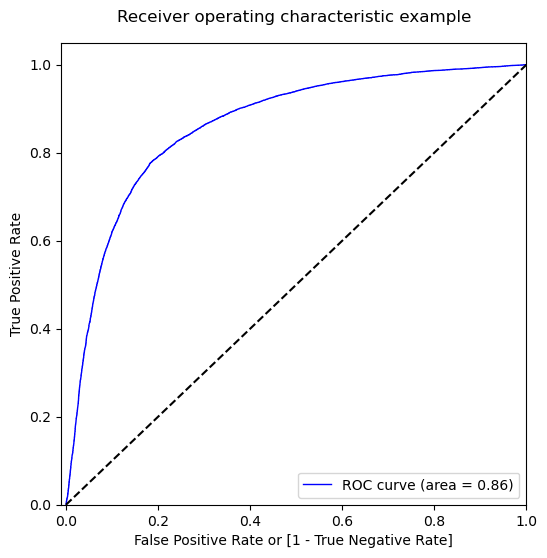

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

##  Optimal cutoff point

##### Creating prediction at different probabiliites

In [88]:
# Let's create columns with different probability cutoffs 
prbs = [x/10 for x in range(10)]
for i in prbs:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
    
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
38086      1    0.790092          1    1    1    1    1    1    1    1    1   
24605      0    0.024733          0    1    0    0    0    0    0    0    0   
15969      0    0.341253          0    1    1    1    1    0    0    0    0   
26787      0    0.702379          1    1    1    1    1    1    1    1    1   
33557      1    0.770501          1    1    1    1    1    1    1    1    1   

       0.8  0.9  
38086    0    0  
24605    0    0  
15969    0    0  
26787    0    0  
33557    0    0

In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

## Calculating the Accuracy Sensitivity and Specificity for each of the probabilites
metrics_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])

for i in prbs:
    cnfsn = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    tn = cnfsn[0,0]
    fp = cnfsn[0,1]
    tp = cnfsn[1,1]
    fn = cnfsn[1,0]
    total = tn+fp+tp+fn
    acrcy = (tp+tn)/total
    sensi = tp/(tp+fn)
    speci = tn/(tn+fp)
    
    metrics_df.loc[i] = [i,acrcy,sensi,speci]

print(metrics_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.501240     1.000000     0.000000
0.1          0.1  0.624794     0.979745     0.268080
0.2          0.2  0.695602     0.956001     0.433909
0.3          0.3  0.743912     0.920489     0.566457
0.4          0.4  0.775545     0.876022     0.674568
0.5          0.5  0.792614     0.818224     0.766876
0.6          0.6  0.790108     0.735798     0.844689
0.7          0.7  0.754978     0.605988     0.904710
0.8          0.8  0.683336     0.420672     0.947305
0.9          0.9  0.554587     0.126686     0.984615


#### Plotting the accuracy sensitivity and specificity values to get a optimal cuttoff point

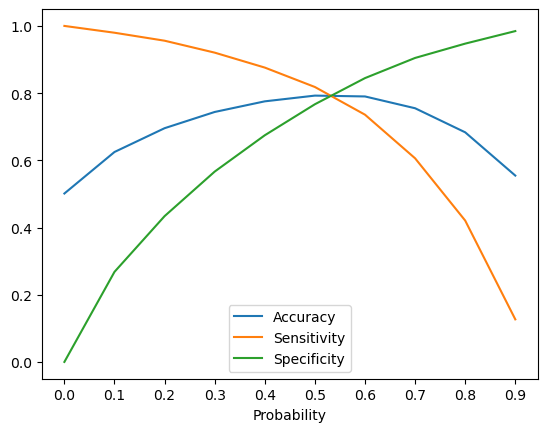

In [90]:
# Plotting accuracy sensitivity and specificity for various probabilities to find optimal point
metrics_df.plot.line(x='Probability',y=['Accuracy','Sensitivity','Specificity'])
plt.xticks(ticks = [x/10 for x in range(10)])
plt.show()

> The point 0.53 is optimal for the model

In [91]:
y_train_pred_final['Final_Predicted_Churn'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.53 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
38086      1    0.790092          1    1    1    1    1    1    1    1    1   
24605      0    0.024733          0    1    0    0    0    0    0    0    0   
15969      0    0.341253          0    1    1    1    1    0    0    0    0   
26787      0    0.702379          1    1    1    1    1    1    1    1    1   
33557      1    0.770501          1    1    1    1    1    1    1    1    1   

       0.8  0.9  Final_Predicted_Churn  
38086    0    0                      1  
24605    0    0                      0  
15969    0    0                      0  
26787    0    0                      1  
33557    0    0                      1

In [92]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = result.predict(X_test_sm).values.reshape(-1)

y_test_pred_final = pd.DataFrame({'Churn': y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.53 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.831200          1
1      1    0.611506          1
2      1    0.923704          1
3      1    0.848232          1
4      1    0.493092          0

### CONFUSION MATRIX and ACCURACY of the MODEL

In [93]:
# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['predicted'])

# Print the confusion matrix
print(f"Confusion Matrix: \n{confusion_matrix}")

# Compute the accuracy score
accuracy = metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['predicted'])

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix: 
[[6579 1679]
 [1697 6466]]
Accuracy: 0.7944


## Top Predictors for the model

In [94]:
# Top 10 predictors

abs(result.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8          1.574110
const                 1.278946
monthly_3g_8          0.811919
gd_ph_loc_ic_mou      0.781440
total_mou_8           0.770592
monthly_2g_8          0.689319
std_ic_t2t_mou_8      0.629416
last_day_rch_amt_8    0.566447
total_rech_num_8      0.549160
sachet_3g_8           0.547934
arpu_8                0.502246
dtype: float64

> * By utilizing Logistic Regression, we have achieved an accuracy rate of 79.2% on the training data and 79.5% on the test data

> * It is evident that the majority of the important features are derived from the `action` phase, which aligns with the business insight that the `action` phase requires more focus.

### 6.2 . Decision Tree

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=10)

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the training data and calculate accuracy
y_train_pred = dt.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Predict on the test data and calculate accuracy
y_test_pred = dt.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Print the results
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Print the classification report on the test data
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_pred))


Train accuracy: 0.8816912436382618
Test accuracy: 0.8439802691675293
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      8258
           1       0.80      0.91      0.85      8163

    accuracy                           0.84     16421
   macro avg       0.85      0.84      0.84     16421
weighted avg       0.85      0.84      0.84     16421



### ROC Curve

In [97]:
from sklearn.metrics import RocCurveDisplay

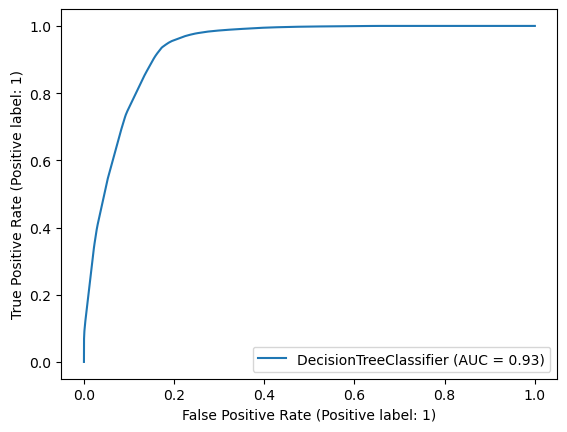

In [98]:
RocCurveDisplay.from_estimator(dt, X_train, y_train)

> * Accuracy on the test set 0.84 and area under curve is 0.93

### Hyperparameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [100]:
grid_search.best_score_

0.8890772497287179

In [101]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=40, random_state=42)

In [102]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      8258
           1       0.88      0.93      0.91      8163

    accuracy                           0.90     16421
   macro avg       0.90      0.90      0.90     16421
weighted avg       0.90      0.90      0.90     16421



### ROC Curve

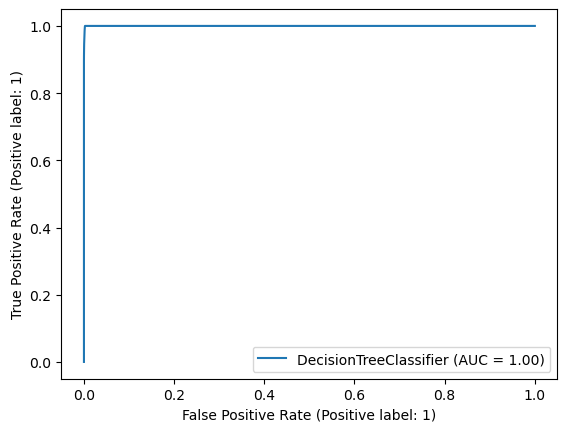

In [104]:
# ROC
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)

> Accuracy is 0.90 on test data with decission tree using hyper parameters and AUC value is 1.00.

> Best fit for the model is at max_depth of 40

## 6. 3. Random Forest Regression - Model

Train accuracy : 0.9182565574840141
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8258
           1       0.86      0.93      0.90      8163

    accuracy                           0.89     16421
   macro avg       0.90      0.89      0.89     16421
weighted avg       0.90      0.89      0.89     16421



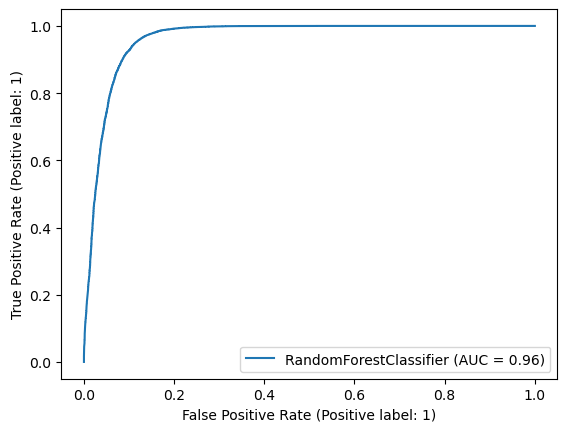

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

# Train Accuracy
y_train_pred = rf.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
RocCurveDisplay.from_estimator(rf, X_train, y_train)

> Accuracy of the model on the training set is 0.89 and Area under curve is 0.96

### Hyperparameter tuning

In [106]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [107]:
grid_search.best_score_

0.9440688771992904

In [108]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [109]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8258
           1       0.94      0.97      0.95      8163

    accuracy                           0.95     16421
   macro avg       0.95      0.95      0.95     16421
weighted avg       0.95      0.95      0.95     16421



### ROC Curve evaluation

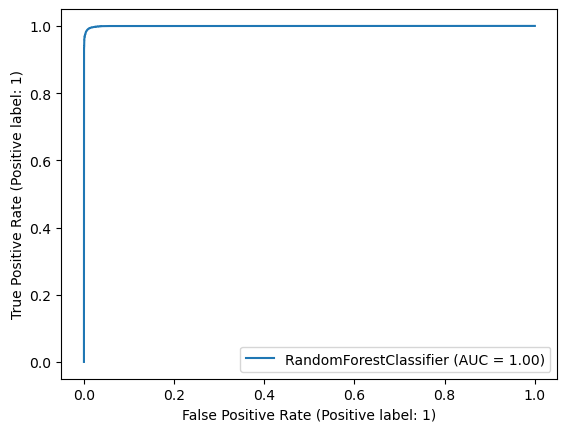

In [111]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)

> Accuracy of 95% on test data, with Random forest

## 6. 4. Adaboost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.6703611229523172

In [114]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

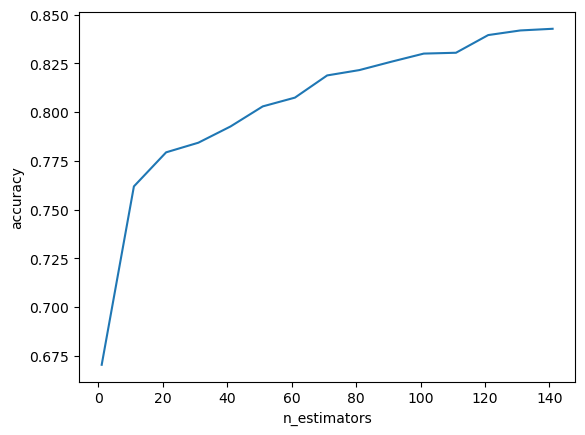

In [115]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [116]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8215
           1       0.94      0.97      0.95      8162

    accuracy                           0.95     16377
   macro avg       0.95      0.95      0.95     16377
weighted avg       0.95      0.95      0.95     16377



# Conclusions

* In order to maintain our customer base and avoid loss of customers, it is imperative that we have a high recall rate. The cost of providing an offer to a customer who is unlikely to churn is lower than the cost of losing a customer and having to acquire a new one. Therefore, we need to have a high rate of correctly identifying customers who are at risk of churning, which requires a high recall rate.

* Upon comparing the performance of various models, it appears that the tuned Random Forest and AdaBoost models are the most effective, with recall rates of 97% and 95% respectively. Given the high performance of both models, we have decided to choose the Random Forest model over the AdaBoost model due to its relative simplicity.


In [117]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [1]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

NameError: name 'rf_best' is not defined

## Strategies to Manage Customer Churn

The top 10 predictors are :






| Features |
| ---------- |
| loc_og_mou_8 |
| total_rech_num_8 |
| monthly_3g_8 |
| monthly_2g_8 |
| gd_ph_loc_og_mou |
| gd_ph_total_rech_num |
| last_day_rch_amt_8 |
| std_ic_t2t_mou_8 |
| sachet_2g_8 |
| aon |






* We can see most of the top predictors are from the action phase, as the drop in engagement is prominent in that phase

Some of the factors we noticed while performing EDA which can be clubed with these insights are:
1. Users whose maximum recharge amount is less than 200 even in the good phase, should have a tag and re-evaluated time to time as they are more likely to churn
2. Users that have been with the network less than 4 years, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 years tend to churn more
3. MOU is one of the major factors, but data especially VBC if the user is not using a data pack if another factor to look out